# **Heart Attack Risk Prediction Using Machine Learning approach on CDC Data**

Introduction

---


Heart attack is a major cause of death worldwide, and traditional diagnostic
methods can be slow and unreliable, which will lead to delays in treatment. This is challenging in areas with limited access to specialized healthcare resources. Through analysis of large datasets, machine learning (ML) could provide a viable approach for early prediction by identifying the key risk factor. This project aims to identify the most significant health indicators of heart attack risk, enhance prediction accuracy to improve patient outcomes, and reduce healthcare burdens.

Dataset: Personal Key Indicators of Heart Disease

Source: Kaggle

`https://www.kaggle.com/datasets/kamilpytlak/personal-key-indicators-of-heart-disease?resource=download`

Dataset description:

---
*   400,000 health-related data
*   health, lifestyle, medical history
*   predict heart disease risk
*   influence public health strategies

# Data Collection

In [ ]:
import kagglehub
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
from scipy.stats import chi2_contingency

In [ ]:
# Download latest version
path = kagglehub.dataset_download("kamilpytlak/personal-key-indicators-of-heart-disease")

print("Path to dataset files:", path)
df = pd.read_csv(path +'/2022/heart_2022_with_nans.csv')

Path to dataset files: /kaggle/input/personal-key-indicators-of-heart-disease


In [ ]:
df.head()

,State,Sex,GeneralHealth,PhysicalHealthDays,MentalHealthDays,LastCheckupTime,PhysicalActivities,SleepHours,RemovedTeeth,HadHeartAttack,...,HeightInMeters,WeightInKilograms,BMI,AlcoholDrinkers,HIVTesting,FluVaxLast12,PneumoVaxEver,TetanusLast10Tdap,HighRiskLastYear,CovidPos
0,Alabama,Female,Very good,0.0,0.0,Within past year (anytime less than 12 months ...,No,8.0,NaN,No,...,NaN,NaN,NaN,No,No,Yes,No,"Yes, received tetanus shot but not sure what type",No,No
1,Alabama,Female,Excellent,0.0,0.0,NaN,No,6.0,NaN,No,...,1.60,68.04,26.57,No,No,No,No,"No, did not receive any tetanus shot in the pa...",No,No
2,Alabama,Female,Very good,2.0,3.0,Within past year (anytime less than 12 months ...,Yes,5.0,NaN,No,...,1.57,63.50,25.61,No,No,No,No,NaN,No,Yes
3,Alabama,Female,Excellent,0.0,0.0,Within past year (anytime less than 12 months ...,Yes,7.0,NaN,No,...,1.65,63.50,23.30,No,No,Yes,Yes,"No, did not receive any tetanus shot in the pa...",No,No
4,Alabama,Female,Fair,2.0,0.0,Within past year (anytime less than 12 months ...,Yes,9.0,NaN,No,...,1.57,53.98,21.77,Yes,No,No,Yes,"No, did not receive any tetanus shot in the pa...",No,No


In [ ]:
df.columns

Index(['State', 'Sex', 'GeneralHealth', 'PhysicalHealthDays',
       'MentalHealthDays', 'LastCheckupTime', 'PhysicalActivities',
       'SleepHours', 'RemovedTeeth', 'HadHeartAttack', 'HadAngina',
       'HadStroke', 'HadAsthma', 'HadSkinCancer', 'HadCOPD',
       'HadDepressiveDisorder', 'HadKidneyDisease', 'HadArthritis',
       'HadDiabetes', 'DeafOrHardOfHearing', 'BlindOrVisionDifficulty',
       'DifficultyConcentrating', 'DifficultyWalking',
       'DifficultyDressingBathing', 'DifficultyErrands', 'SmokerStatus',
       'ECigaretteUsage', 'ChestScan', 'RaceEthnicityCategory', 'AgeCategory',
       'HeightInMeters', 'WeightInKilograms', 'BMI', 'AlcoholDrinkers',
       'HIVTesting', 'FluVaxLast12', 'PneumoVaxEver', 'TetanusLast10Tdap',
       'HighRiskLastYear', 'CovidPos'],
      dtype='object')

In [ ]:
del df['RaceEthnicityCategory']
del df['State']

In [ ]:
print(df.shape)
df_dropna = df.dropna(thresh=len(df)*0.2,axis = 1)
print(df_dropna.shape)

(445132, 38)
(445132, 38)


In [ ]:
df.describe(include='all').transpose()

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Sex,445132,2,Female,235893,NaN,NaN,NaN,NaN,NaN,NaN,NaN
GeneralHealth,443934,5,Very good,148444,NaN,NaN,NaN,NaN,NaN,NaN,NaN
PhysicalHealthDays,434205.0,NaN,NaN,NaN,4.347919,8.688912,0.0,0.0,0.0,3.0,30.0
MentalHealthDays,436065.0,NaN,NaN,NaN,4.382649,8.387475,0.0,0.0,0.0,5.0,30.0
LastCheckupTime,436824,4,Within past year (anytime less than 12 months ...,350944,NaN,NaN,NaN,NaN,NaN,NaN,NaN
PhysicalActivities,444039,2,Yes,337559,NaN,NaN,NaN,NaN,NaN,NaN,NaN
SleepHours,439679.0,NaN,NaN,NaN,7.022983,1.502425,1.0,6.0,7.0,8.0,24.0
RemovedTeeth,433772,4,None of them,233455,NaN,NaN,NaN,NaN,NaN,NaN,NaN
HadHeartAttack,442067,2,No,416959,NaN,NaN,NaN,NaN,NaN,NaN,NaN
HadAngina,440727,2,No,414176,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
num_col = [
    'PhysicalHealthDays',
    'MentalHealthDays',
    'SleepHours',
    'HeightInMeters',
    'WeightInKilograms',
    'BMI'
]
cat_df = df[df.columns[~df.columns.isin(num_col)]]
for col in list(cat_df):
  print('variable:', col)
  print(cat_df[col].value_counts(dropna=False).to_string())

variable: Sex
Sex
Female    235893
Male      209239
variable: GeneralHealth
GeneralHealth
Very good    148444
Good         143598
Excellent     71878
Fair          60273
Poor          19741
NaN            1198
variable: LastCheckupTime
LastCheckupTime
Within past year (anytime less than 12 months ago)         350944
Within past 2 years (1 year but less than 2 years ago)      41919
Within past 5 years (2 years but less than 5 years ago)     24882
5 or more years ago                                         19079
NaN                                                          8308
variable: PhysicalActivities
PhysicalActivities
Yes    337559
No     106480
NaN      1093
variable: RemovedTeeth
RemovedTeeth
None of them              233455
1 to 5                    129294
6 or more, but not all     45570
All                        25453
NaN                        11360
variable: HadHeartAttack
HadHeartAttack
No     416959
Yes     25108
NaN      3065
variable: HadAngina
HadAngina
No     414176
Y

# Data Pre-processing

In [ ]:
print(df.isnull().sum())

Sex                              0
GeneralHealth                 1198
PhysicalHealthDays           10927
MentalHealthDays              9067
LastCheckupTime               8308
PhysicalActivities            1093
SleepHours                    5453
RemovedTeeth                 11360
HadHeartAttack                3065
HadAngina                     4405
HadStroke                     1557
HadAsthma                     1773
HadSkinCancer                 3143
HadCOPD                       2219
HadDepressiveDisorder         2812
HadKidneyDisease              1926
HadArthritis                  2633
HadDiabetes                   1087
DeafOrHardOfHearing          20647
BlindOrVisionDifficulty      21564
DifficultyConcentrating      24240
DifficultyWalking            24012
DifficultyDressingBathing    23915
DifficultyErrands            25656
SmokerStatus                 35462
ECigaretteUsage              35660
ChestScan                    56046
AgeCategory                   9079
HeightInMeters      

In [ ]:
# mean imputation for numerical columns
num_df = df[num_col]
for col in list(num_df):
  num_df[col] = num_df[col].fillna(num_df[col].mean())

# -1 imputation for categorical columns
cat_df = cat_df.fillna(-1)

df_cleaned = pd.concat([num_df, cat_df], axis=1)
df_cleaned = df_cleaned[df_cleaned['HadHeartAttack'].isin(['Yes','No'])]

df_cleaned['HadHeartAttack'].value_counts(dropna=False)

<ipython-input-10-eede2e6b14d8>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  num_df[col] = num_df[col].fillna(num_df[col].mean())


,count
HadHeartAttack,
No,416959
Yes,25108


In [ ]:
cat_df_cleaned = df_cleaned[df_cleaned.columns[~df_cleaned.columns.isin(num_col)]]
for col in list(cat_df_cleaned):
  print('variable:', col)
  print(cat_df_cleaned[col].value_counts(dropna=False).to_string())

variable: Sex
Sex
Female    234519
Male      207548
variable: GeneralHealth
GeneralHealth
Very good    147967
Good         142550
Excellent     71623
Fair          59528
Poor          19304
-1             1095
variable: LastCheckupTime
LastCheckupTime
Within past year (anytime less than 12 months ago)         348653
Within past 2 years (1 year but less than 2 years ago)      41689
Within past 5 years (2 years but less than 5 years ago)     24742
5 or more years ago                                         18942
-1                                                           8041
variable: PhysicalActivities
PhysicalActivities
Yes    335778
No     105317
-1        972
variable: RemovedTeeth
RemovedTeeth
None of them              232493
1 to 5                    128397
6 or more, but not all     45100
All                        25067
-1                         11010
variable: HadHeartAttack
HadHeartAttack
No     416959
Yes     25108
variable: HadAngina
HadAngina
No     412331
Yes     26148
-

In [ ]:
df_cleaned.columns

Index(['PhysicalHealthDays', 'MentalHealthDays', 'SleepHours',
       'HeightInMeters', 'WeightInKilograms', 'BMI', 'Sex', 'GeneralHealth',
       'LastCheckupTime', 'PhysicalActivities', 'RemovedTeeth',
       'HadHeartAttack', 'HadAngina', 'HadStroke', 'HadAsthma',
       'HadSkinCancer', 'HadCOPD', 'HadDepressiveDisorder', 'HadKidneyDisease',
       'HadArthritis', 'HadDiabetes', 'DeafOrHardOfHearing',
       'BlindOrVisionDifficulty', 'DifficultyConcentrating',
       'DifficultyWalking', 'DifficultyDressingBathing', 'DifficultyErrands',
       'SmokerStatus', 'ECigaretteUsage', 'ChestScan', 'AgeCategory',
       'AlcoholDrinkers', 'HIVTesting', 'FluVaxLast12', 'PneumoVaxEver',
       'TetanusLast10Tdap', 'HighRiskLastYear', 'CovidPos'],
      dtype='object')

# Exploratory Data Analysis


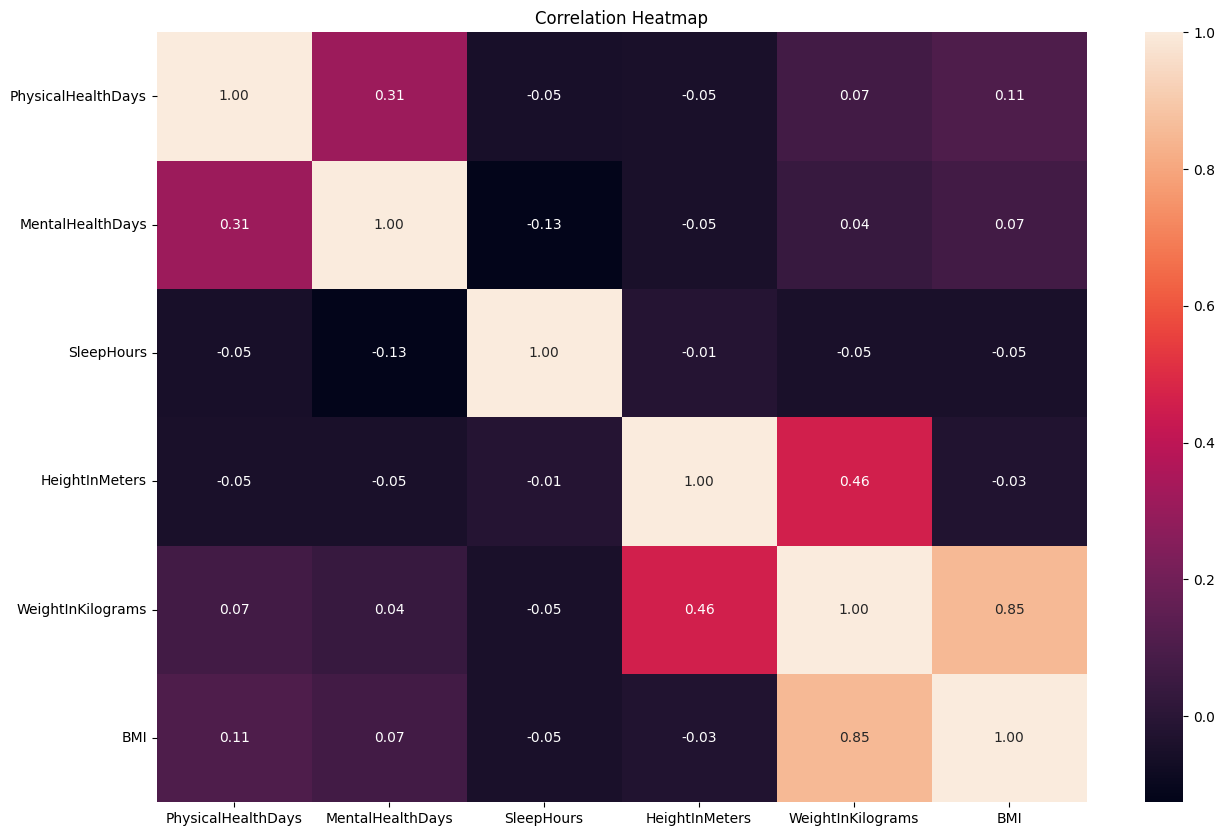

In [ ]:
%matplotlib inline
plt.figure(figsize=(15,10))
num_df_cleaned = df_cleaned[num_col]
corr = num_df_cleaned.corr(method='pearson')
sns.heatmap(corr, annot=True, fmt='.2f',
            xticklabels = corr.columns,
            yticklabels = corr.columns)
corr.to_excel("heart_disease_corr.xlsx", sheet_name = 'corr')

plt.title('Correlation Heatmap')
plt.show()

In [ ]:
del df_cleaned['HeightInMeters']
del df_cleaned['WeightInKilograms']

In [ ]:
num_df_cleaned.describe(include='all').transpose()

,count,mean,std,min,25%,50%,75%,max
PhysicalHealthDays,442067.0,4.323245,8.557946,0.00,0.00,0.00,4.000000,30.00
MentalHealthDays,442067.0,4.371630,8.289048,0.00,0.00,0.00,4.382649,30.00
SleepHours,442067.0,7.023264,1.487587,1.00,6.00,7.00,8.000000,24.00
HeightInMeters,442067.0,1.702754,0.103676,0.91,1.63,1.70,1.780000,2.41
WeightInKilograms,442067.0,83.077076,20.409021,22.68,68.04,81.65,91.630000,292.57
BMI,442067.0,28.528038,6.184225,12.02,24.41,28.29,31.010000,99.64


In [ ]:
num_df_cleaned['PhysicalHealthDays_gp'] = pd.cut(num_df_cleaned['PhysicalHealthDays'], 5, labels=False)
num_df_cleaned['MentalHealthDays_gp'] = pd.cut(num_df_cleaned['MentalHealthDays'], 5, labels=False)
num_df_cleaned['SleepHours_gp'] = pd.qcut(num_df_cleaned['SleepHours'], 4, labels=False)
num_df_cleaned['BMI_gp'] = pd.qcut(num_df_cleaned['BMI'], 4, labels=False)

<ipython-input-16-6d04087422d7>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  num_df_cleaned['PhysicalHealthDays_gp'] = pd.cut(num_df_cleaned['PhysicalHealthDays'], 5, labels=False)
<ipython-input-16-6d04087422d7>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  num_df_cleaned['MentalHealthDays_gp'] = pd.cut(num_df_cleaned['MentalHealthDays'], 5, labels=False)
<ipython-input-16-6d04087422d7>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_

In [ ]:
def BVA_numerical_plot(df, tar, cat):
  col_count_0 = df[df[tar] == 'No'].groupby(cat).size().rename('No')
  col_count_1 = df[df[tar] == 'Yes'].groupby(cat).size().rename('Yes')

  col_count = pd.merge(
      left = col_count_0,
      right = col_count_1,
      how = 'left',
      left_index = True,
      right_index = True
  )
  f, ax = plt.subplots(figsize=(8, 4))

  g = sns.lineplot(x=col_count.index, y=col_count.No, linewidth = 2.5, label = "No")
  g = sns.lineplot(x=col_count.index, y=col_count.Yes, linewidth = 2.5, label = "Yes")

  plt.xticks(rotation=90)
  g.yaxis.grid(True)

  g.set(xlabel=col, ylabel="Count", title="Column {} vs {}".format(col,tar))

  sns.despine(left=True);

<ipython-input-18-f4e621d018d2>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  num_df_cleaned['HadHeartAttack'] = df_cleaned['HadHeartAttack']


<Figure size 640x480 with 0 Axes>

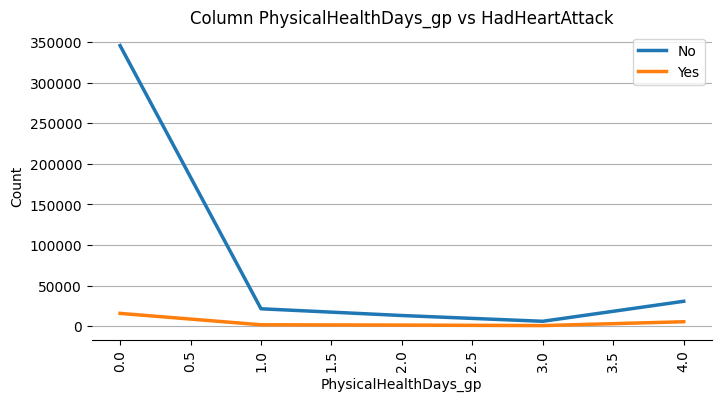

<Figure size 640x480 with 0 Axes>

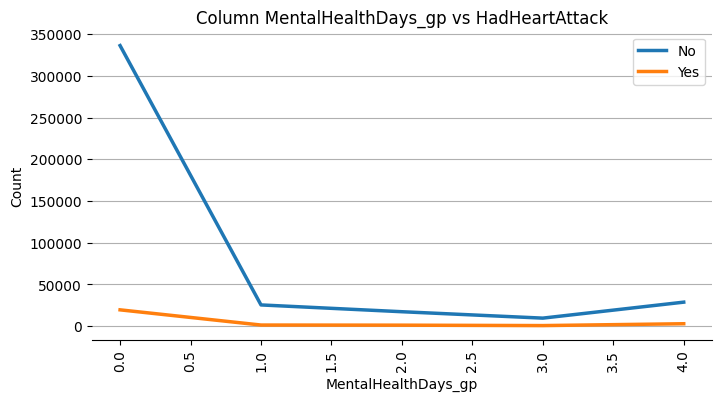

<Figure size 640x480 with 0 Axes>

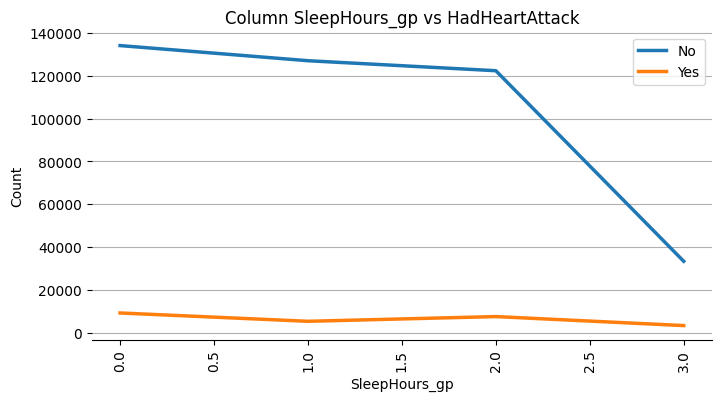

<Figure size 640x480 with 0 Axes>

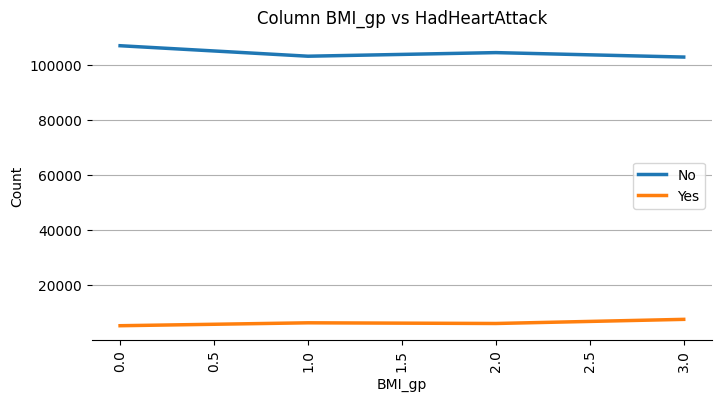

In [ ]:
num_df_cleaned['HadHeartAttack'] = df_cleaned['HadHeartAttack']
num_gp_features = [
    'PhysicalHealthDays_gp',
    'MentalHealthDays_gp',
    'SleepHours_gp',
    'BMI_gp'
]
for col in num_gp_features:
  if col != 'HadHeartAttack':
    plt.figure()
    BVA_numerical_plot(num_df_cleaned, 'HadHeartAttack', col)
    plt.show()

In [ ]:
def BVA_categorical_plot(df, tar, cat):

  df = df[[cat,tar]][:]
  table = pd.crosstab(df[tar],df[cat],)
  f_obs = np.array([table.iloc[0][:].values, table.iloc[1][:].values])

  chi2, p, dof, expected = chi2_contingency(f_obs)

  if p<0.05:
    sig = True
  else:
    sig = False

  sns.countplot(x=cat, hue=tar, data=df)
  plt.title("Column {} \n p-value = {}\n difference significant? = {}\n".format(cat,p,sig))

  ax1 = df.groupby(cat)[tar].value_counts(normalize=True).unstack()
  ax1.plot(kind='bar', stacked='True',title=str(ax1))

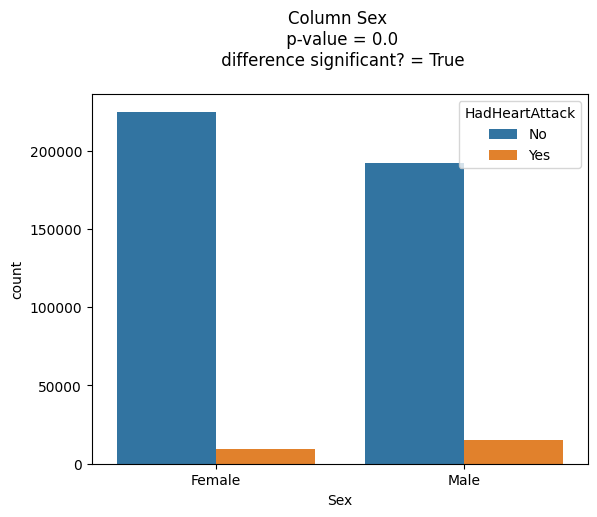

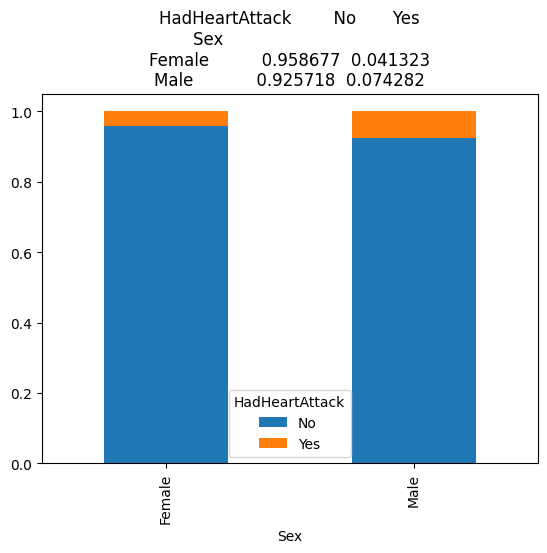

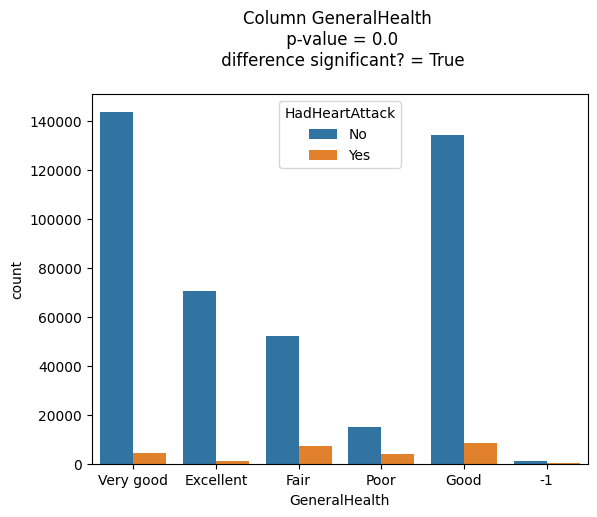

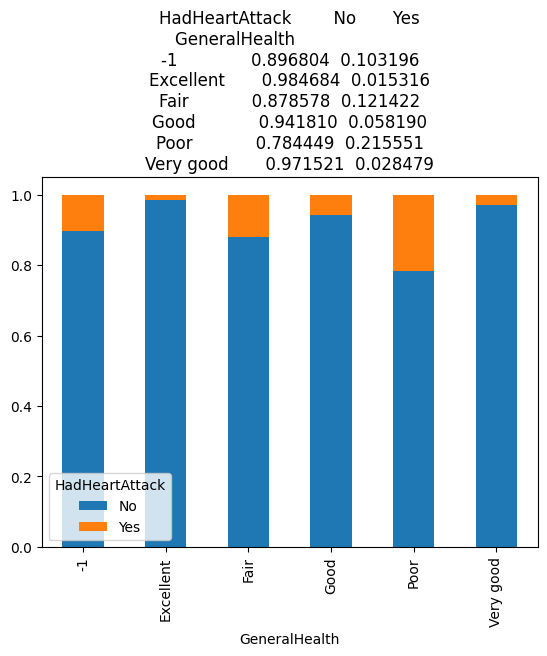

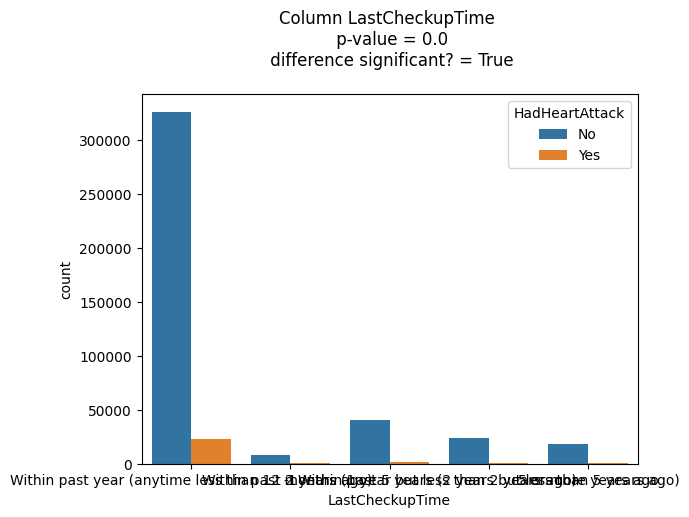

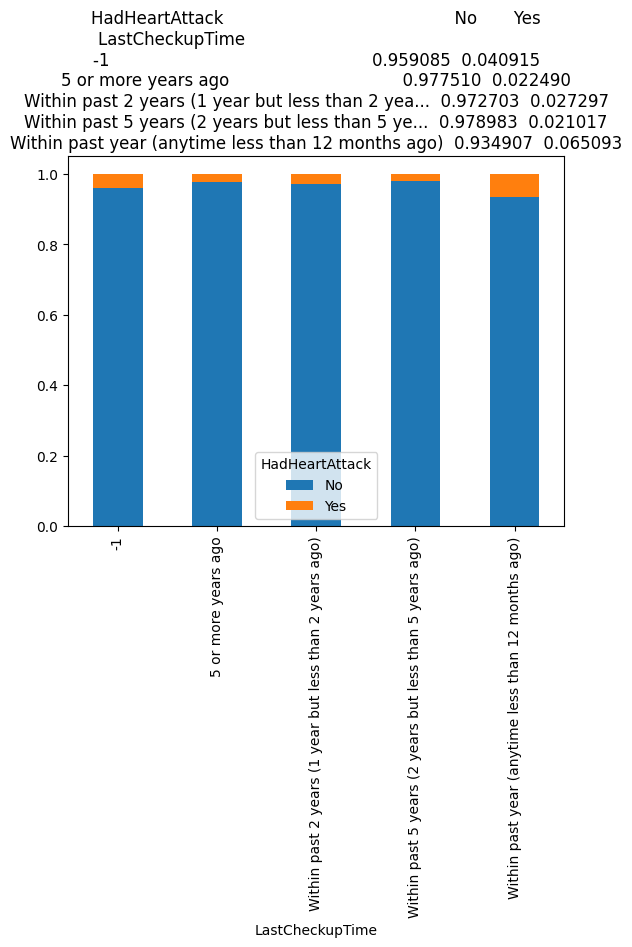

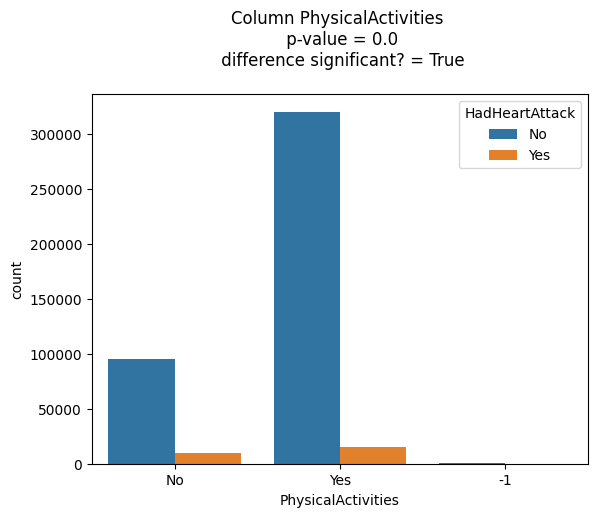

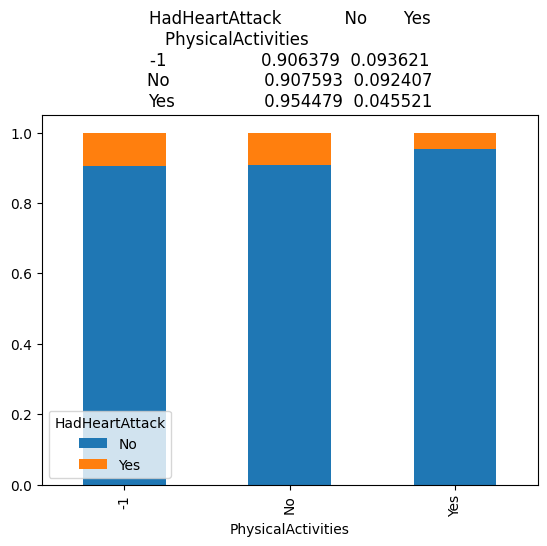

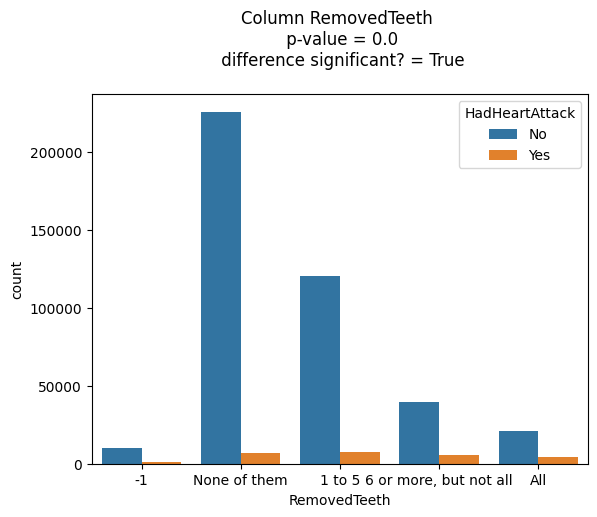

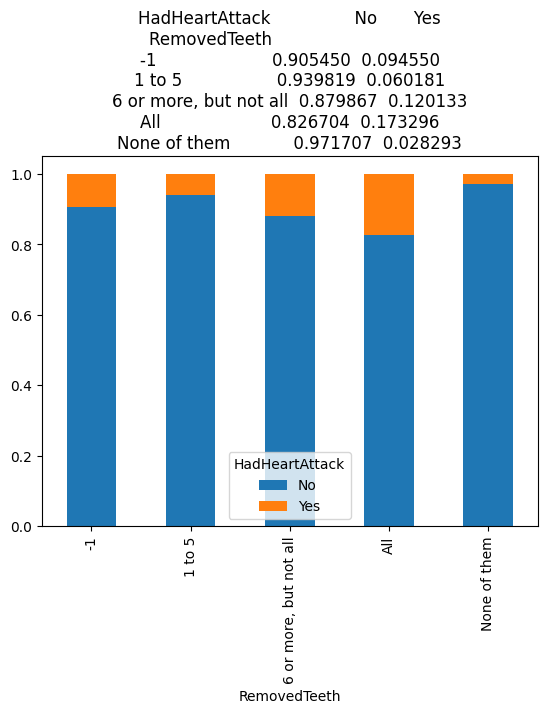

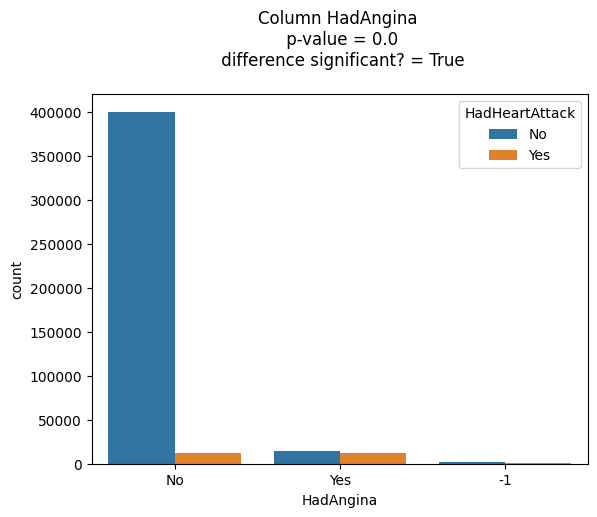

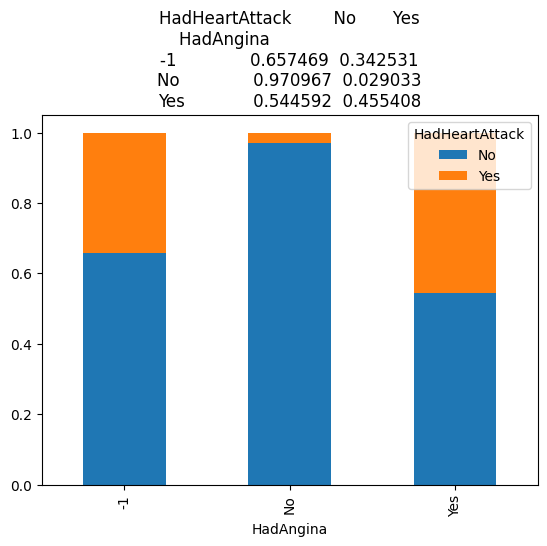

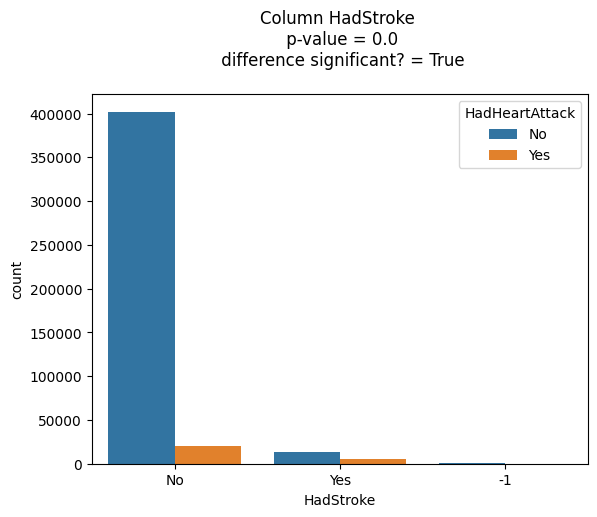

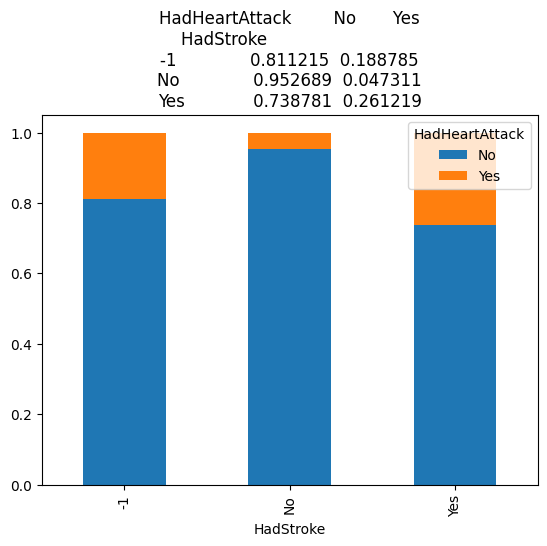

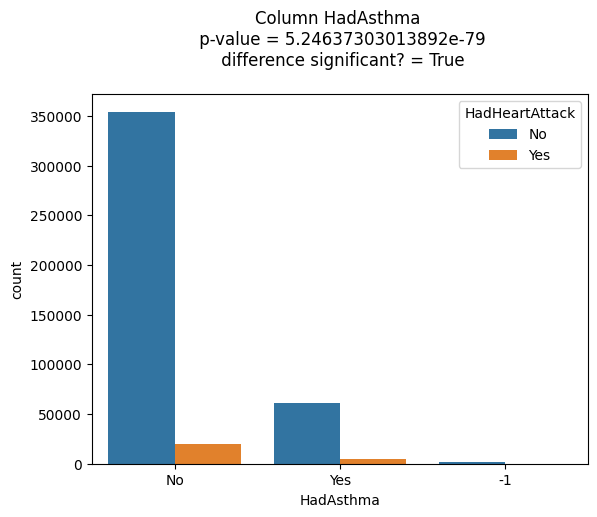

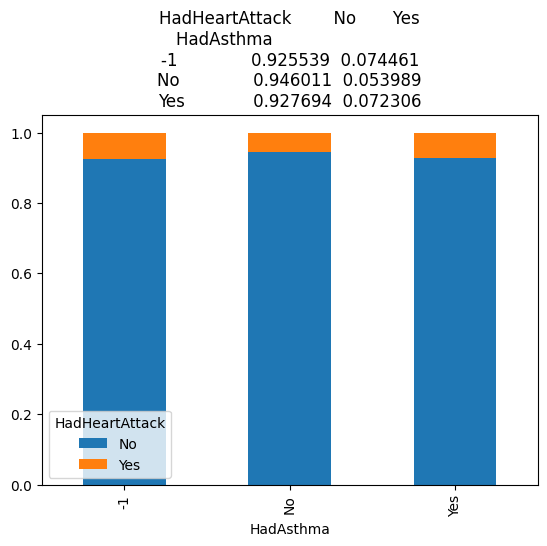

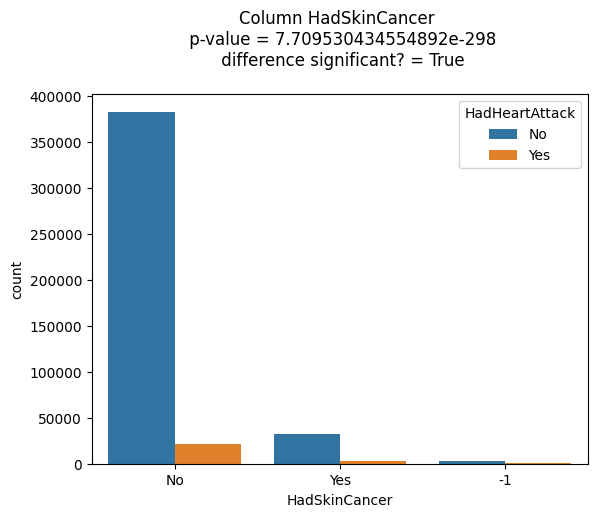

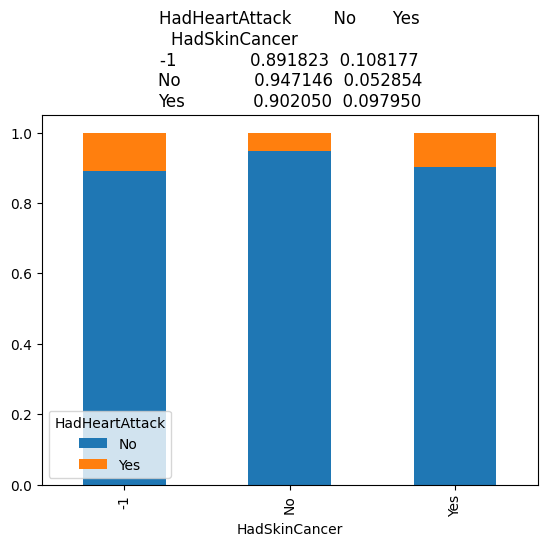

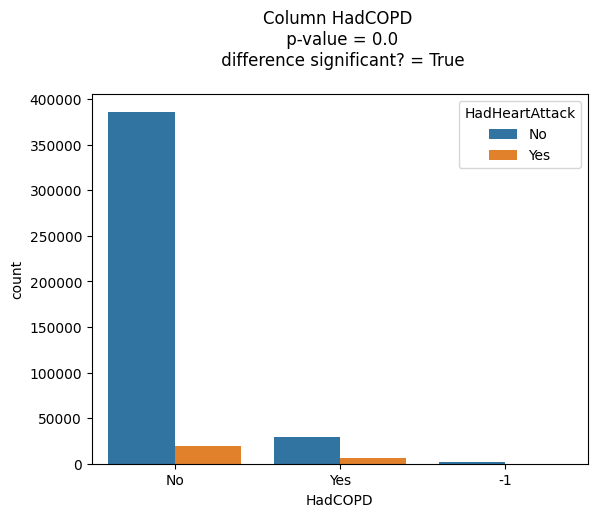

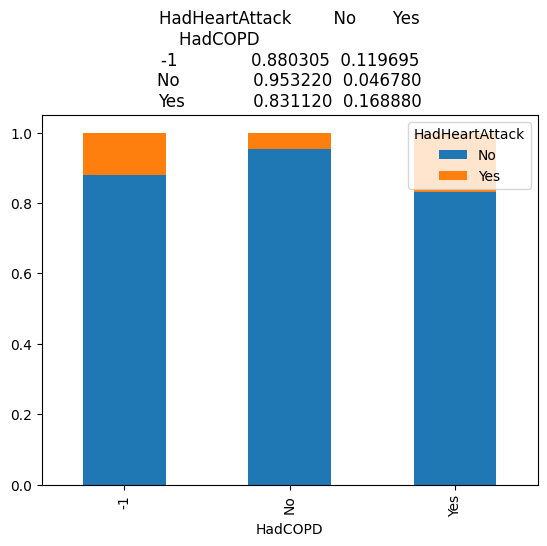

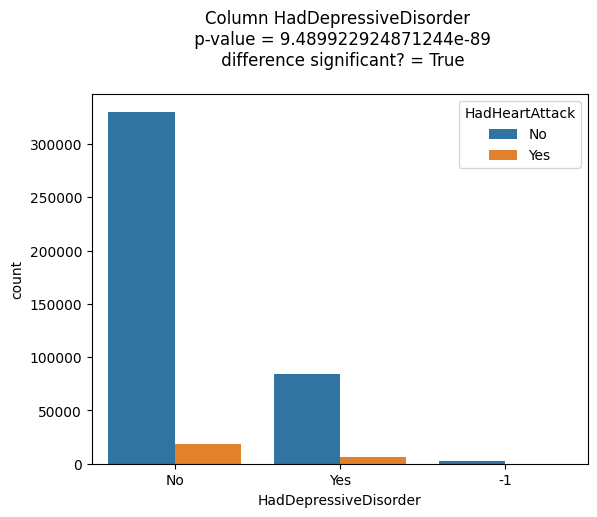

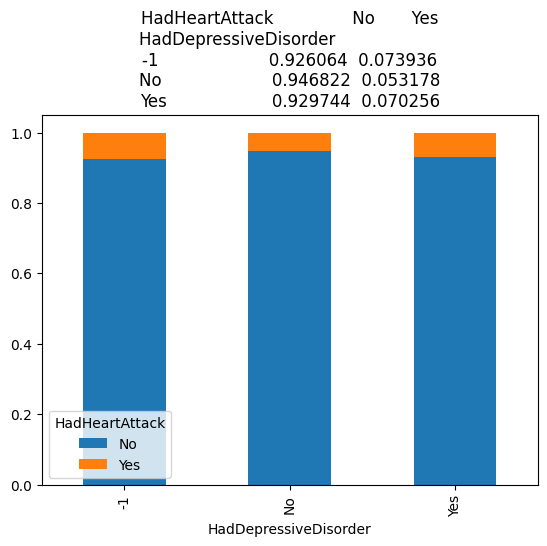

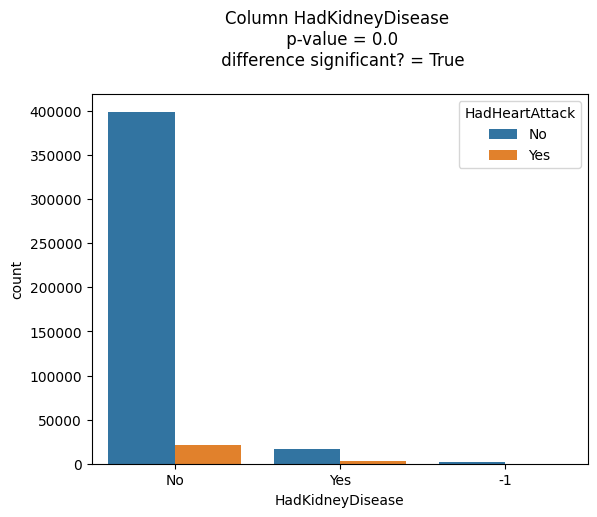

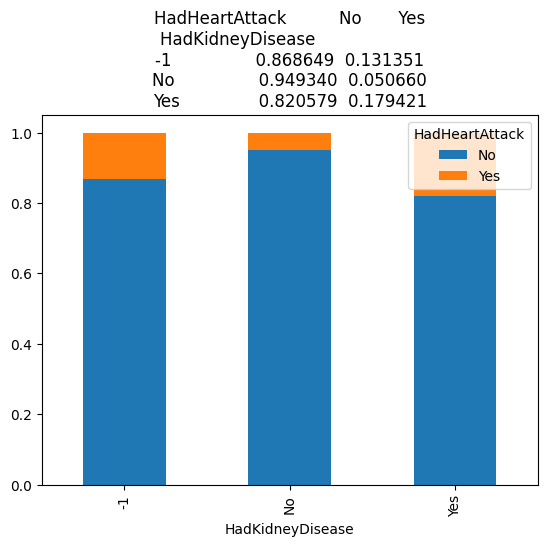

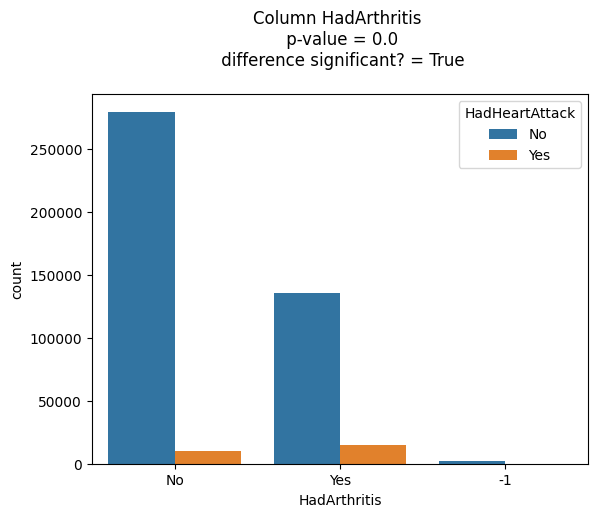

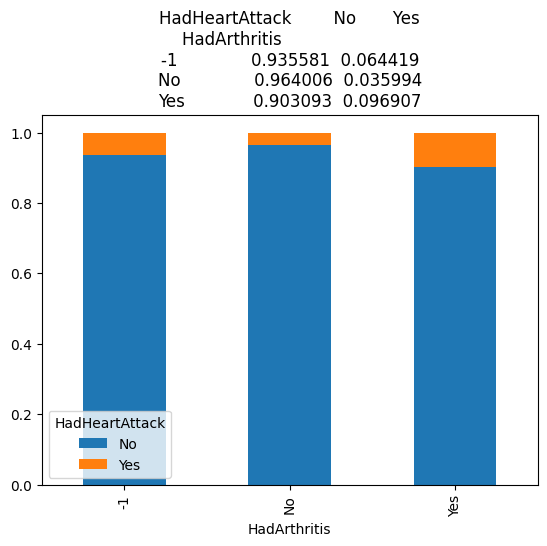

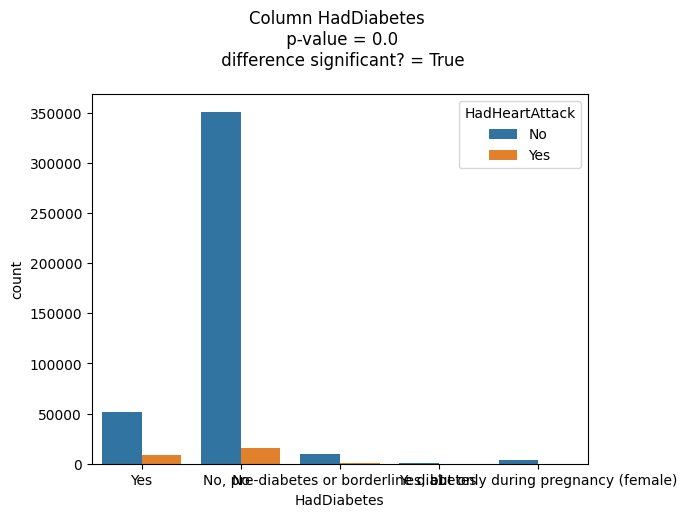

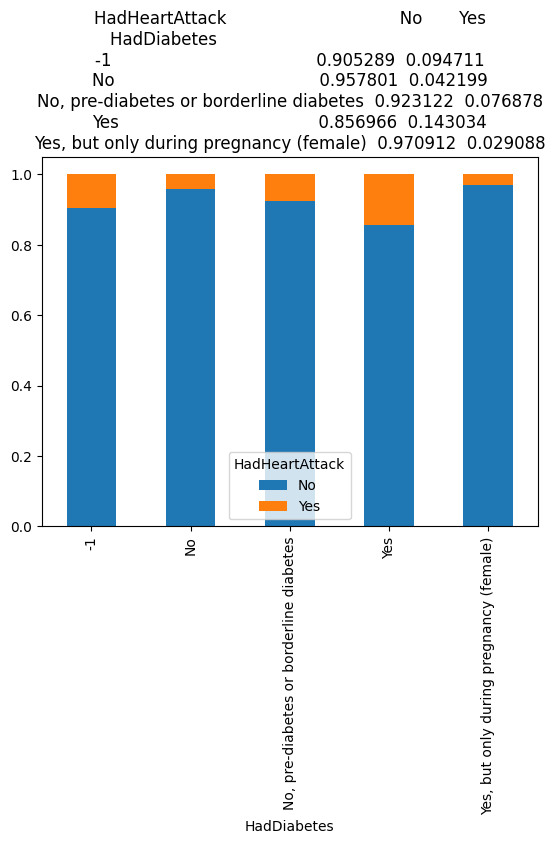

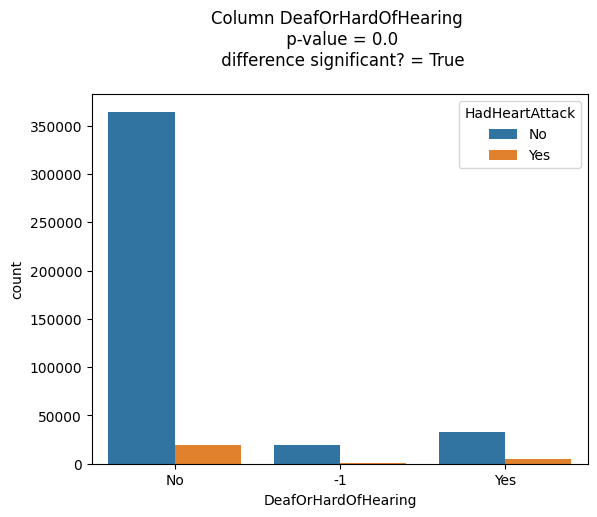

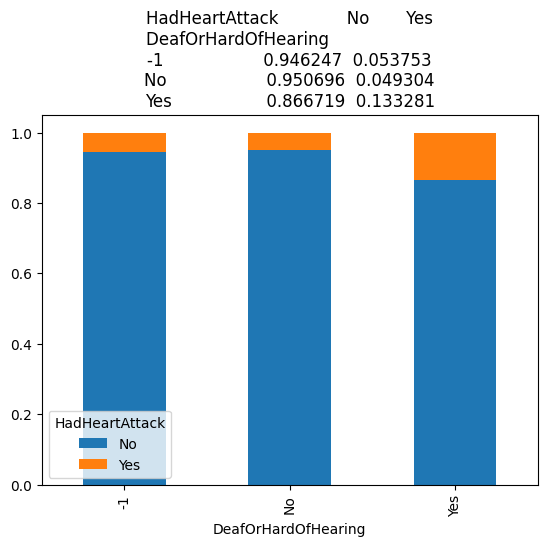

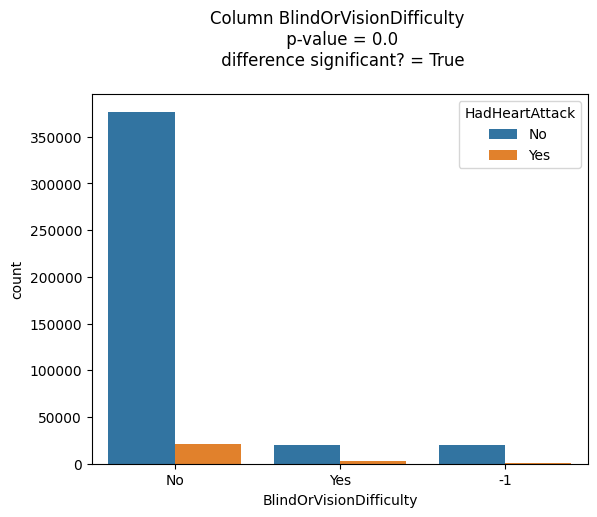

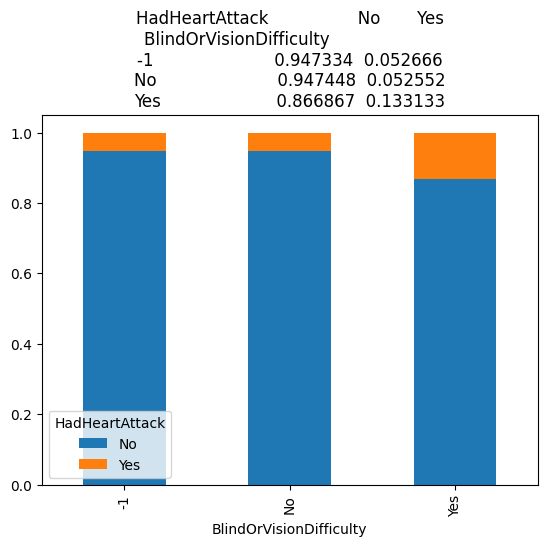

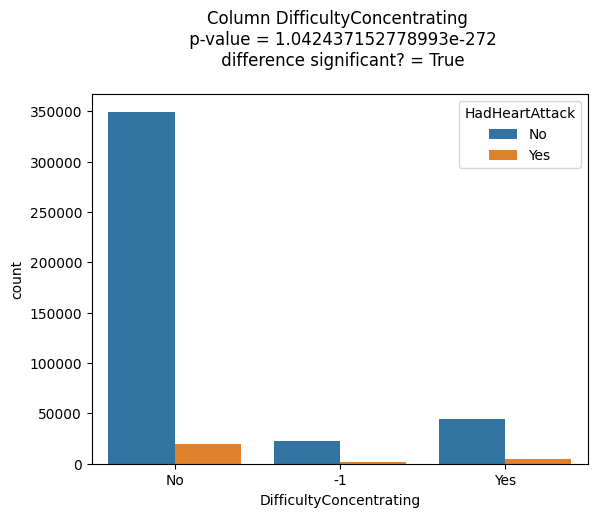

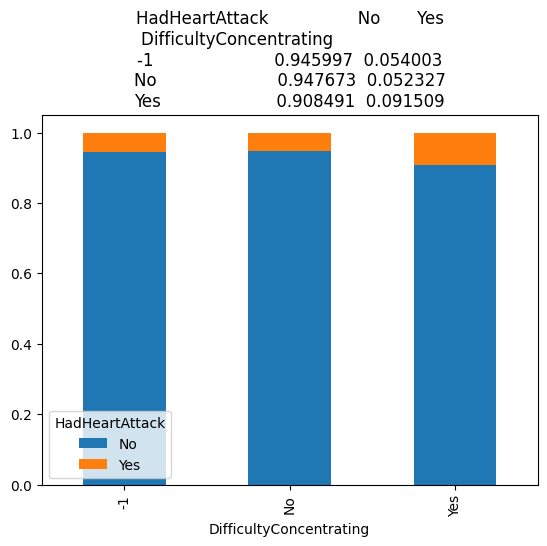

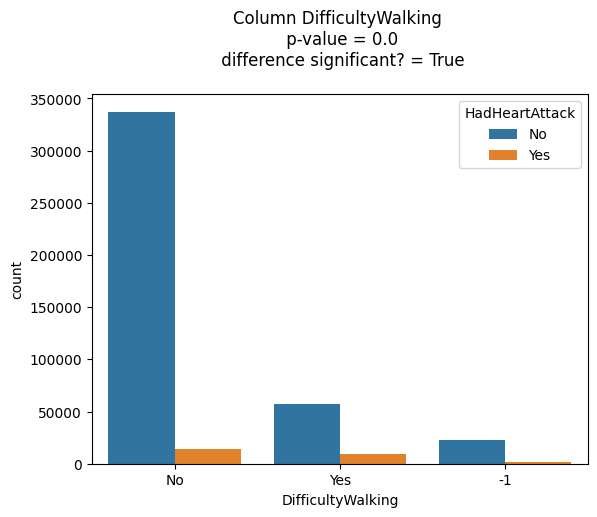

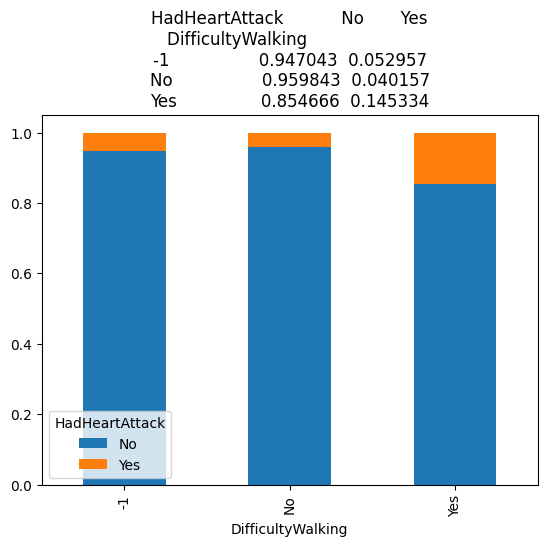

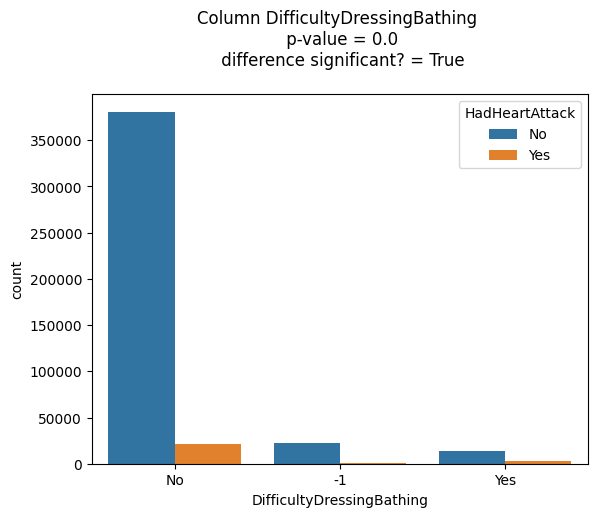

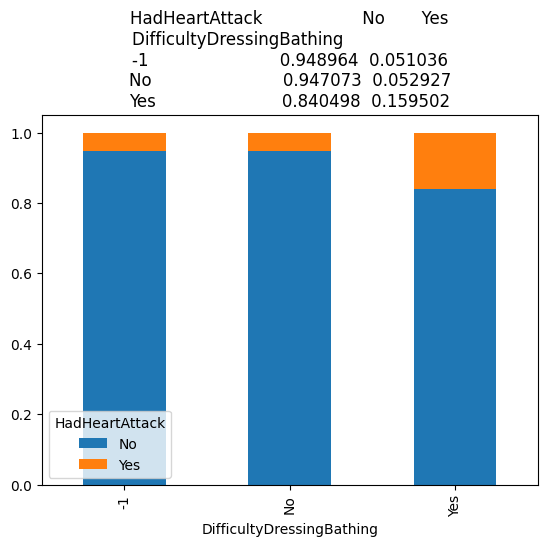

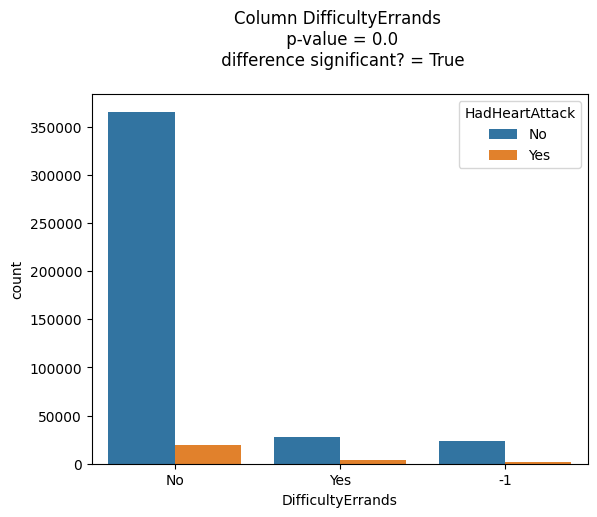

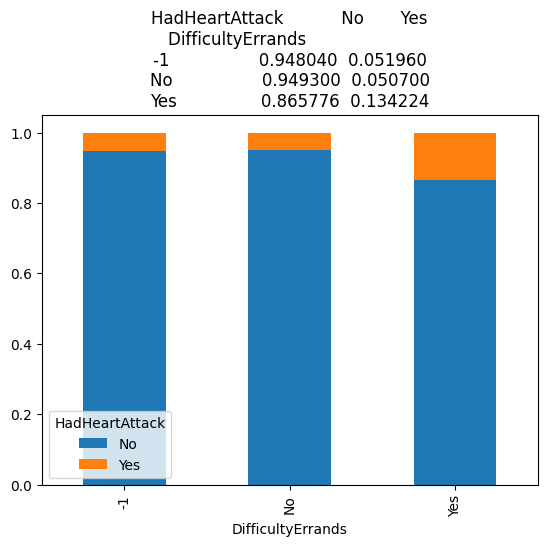

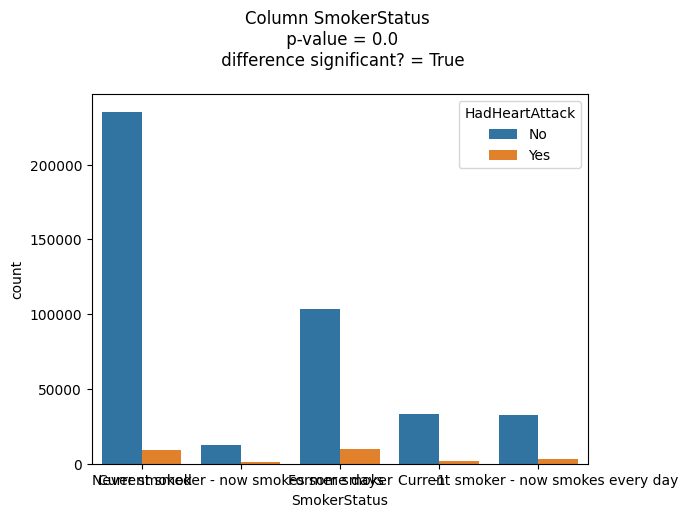

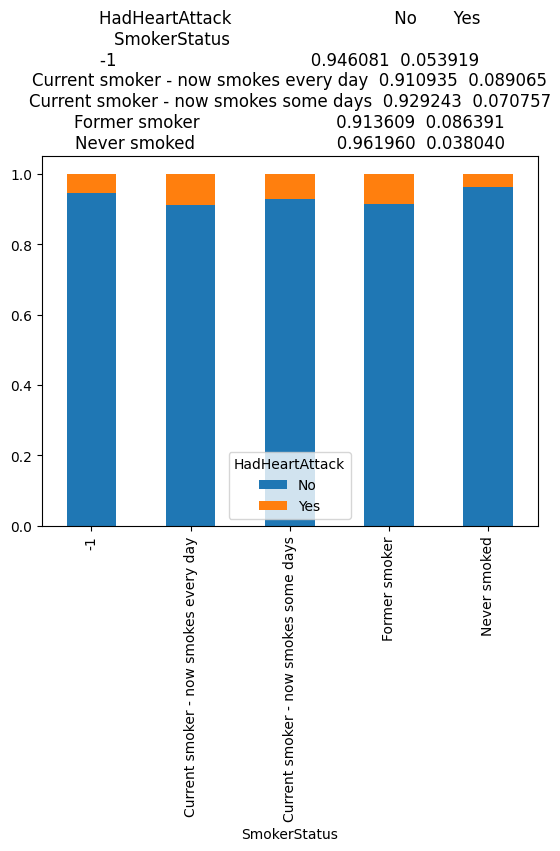

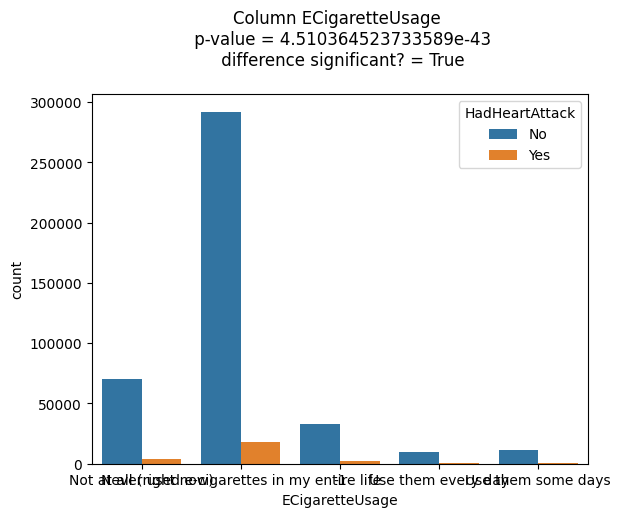

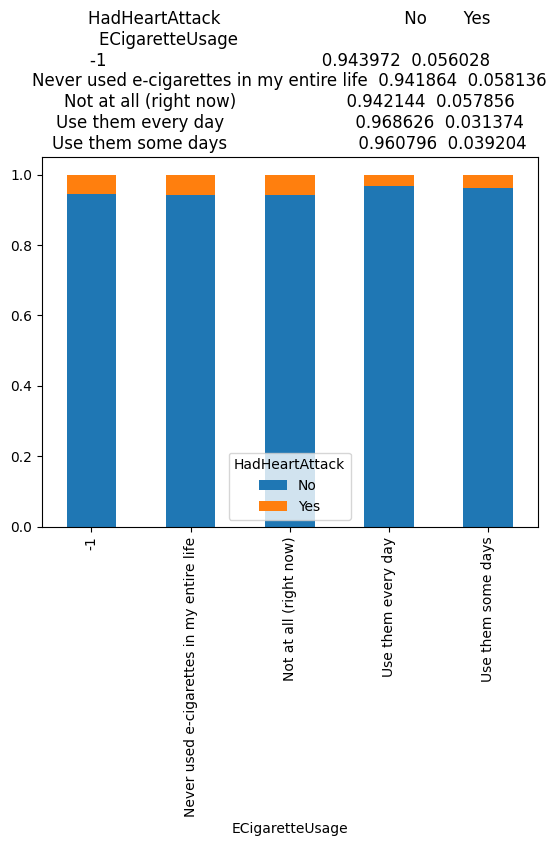

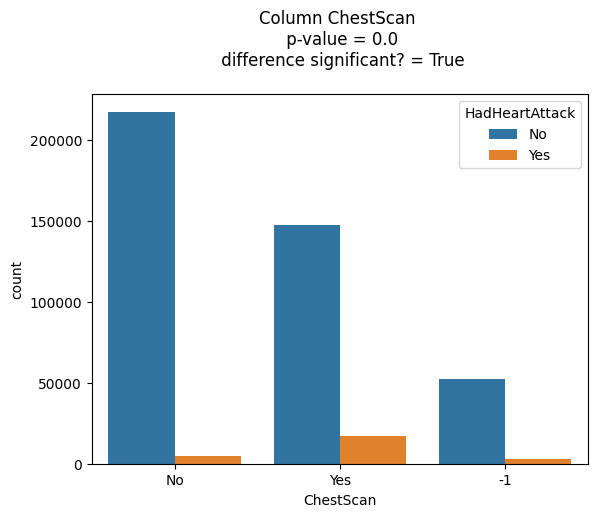

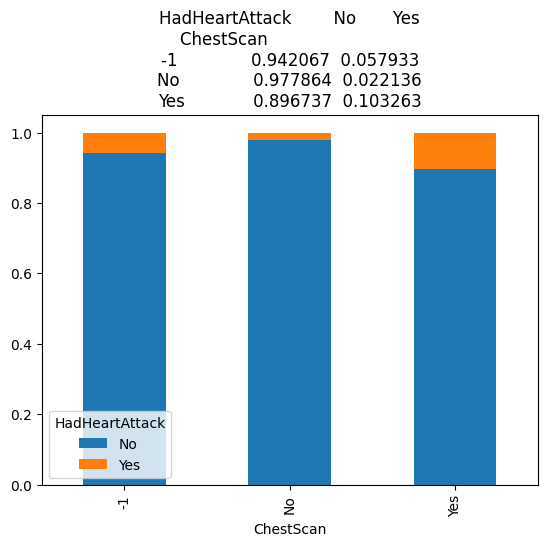

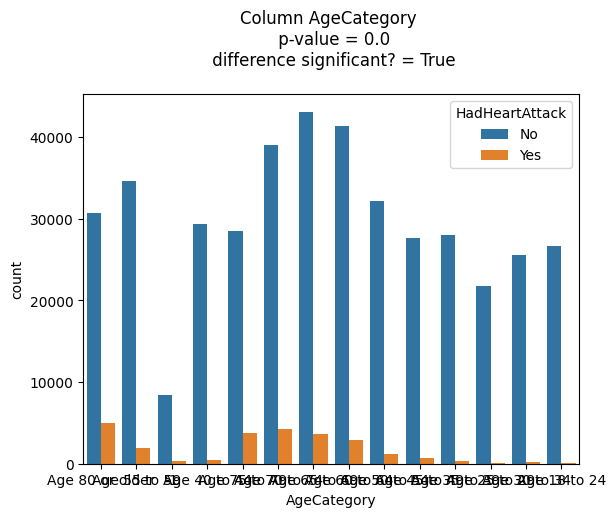

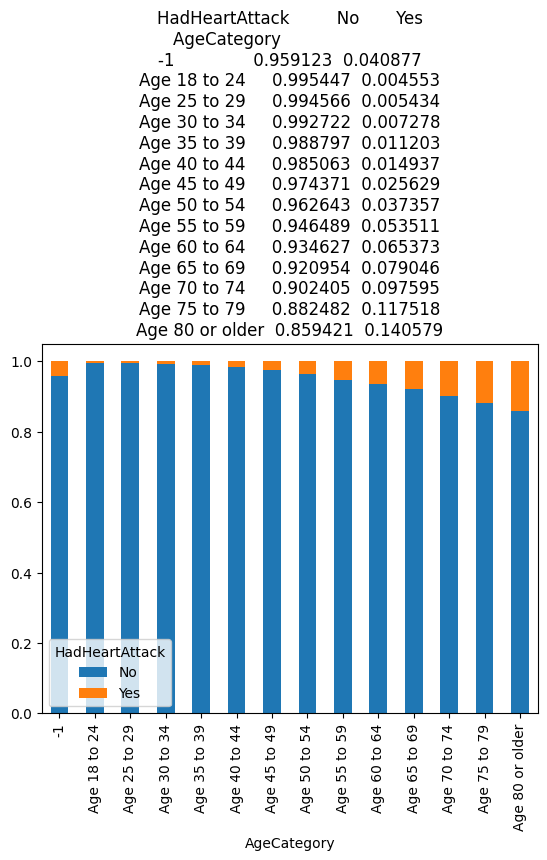

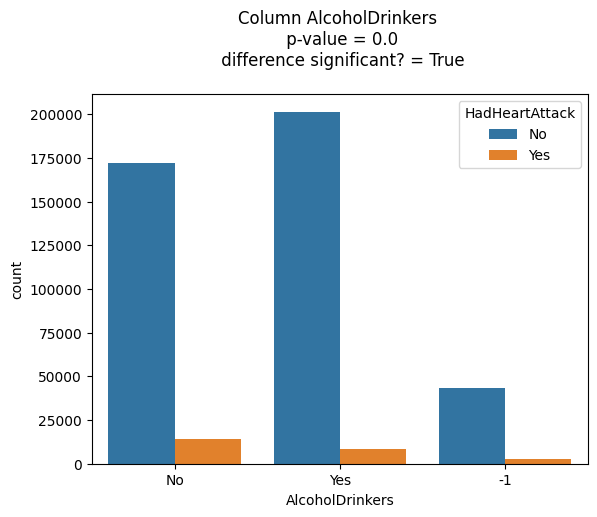

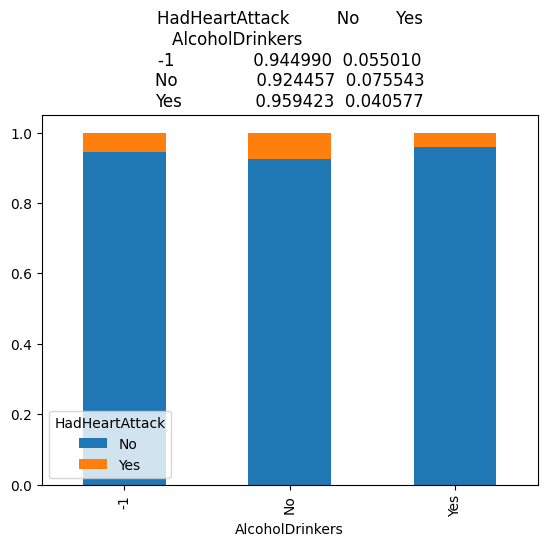

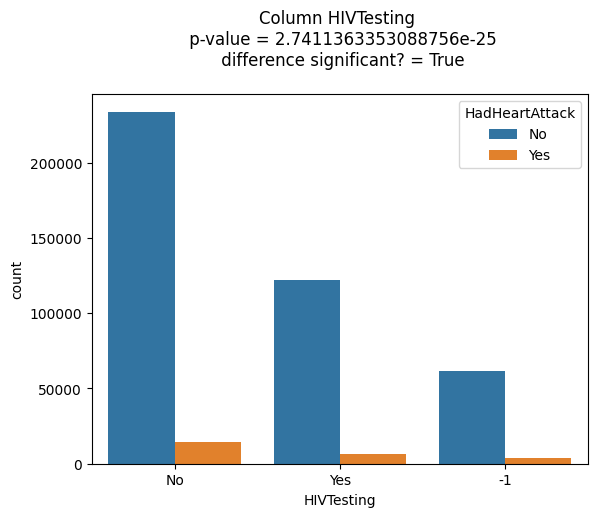

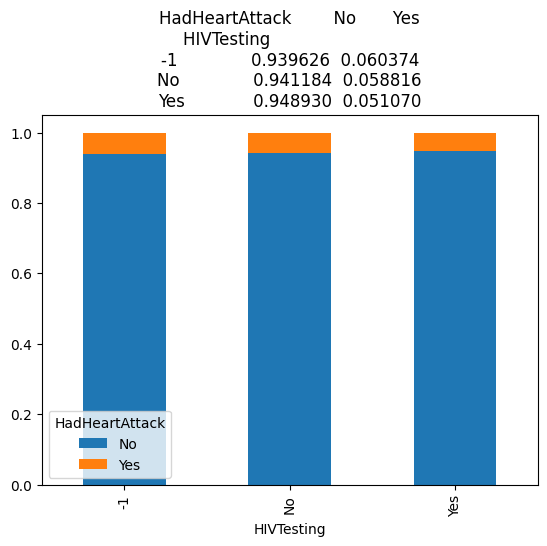

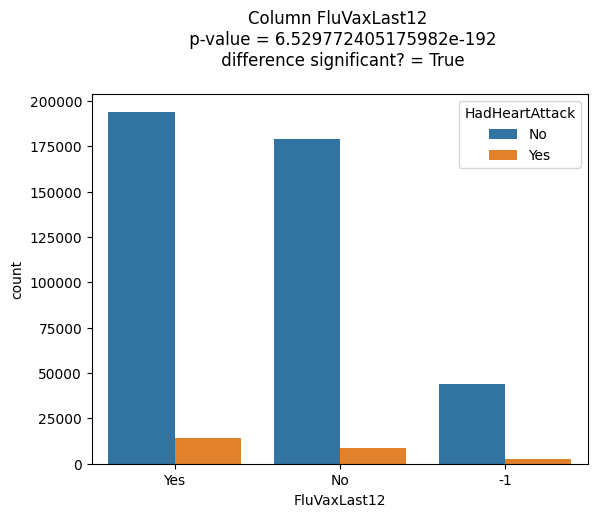

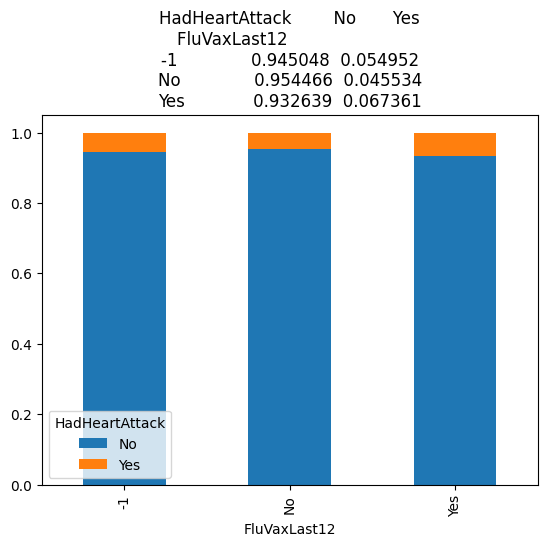

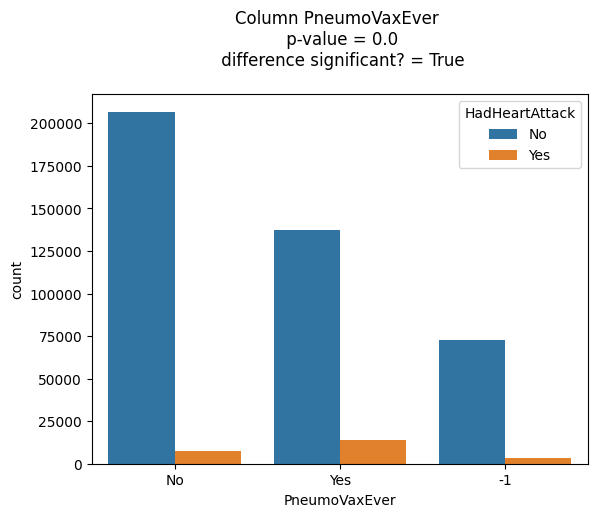

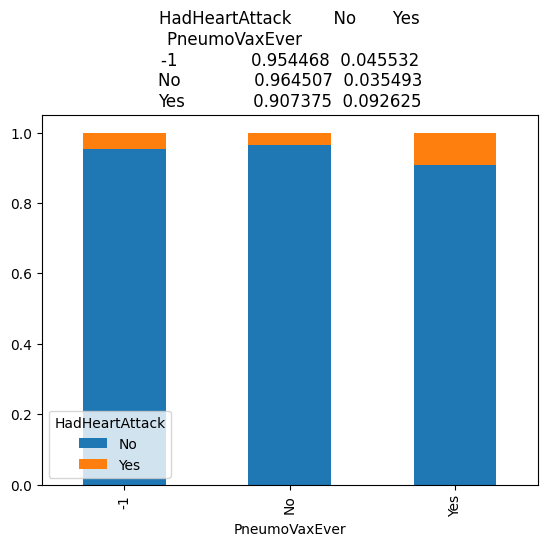

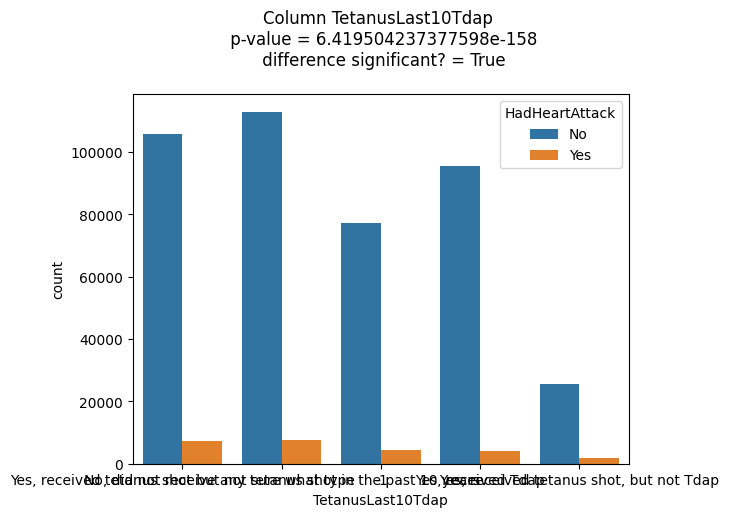

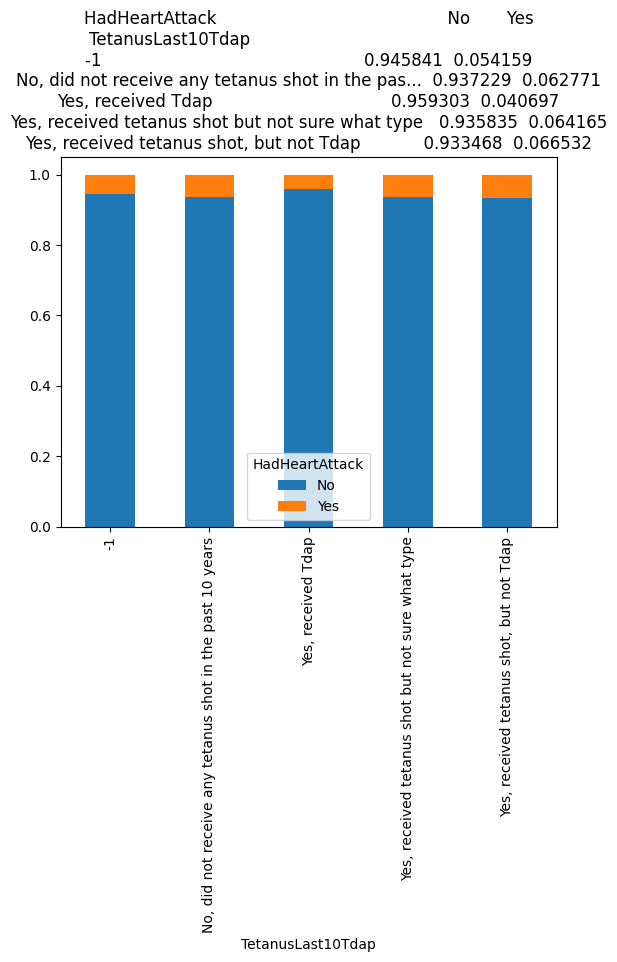

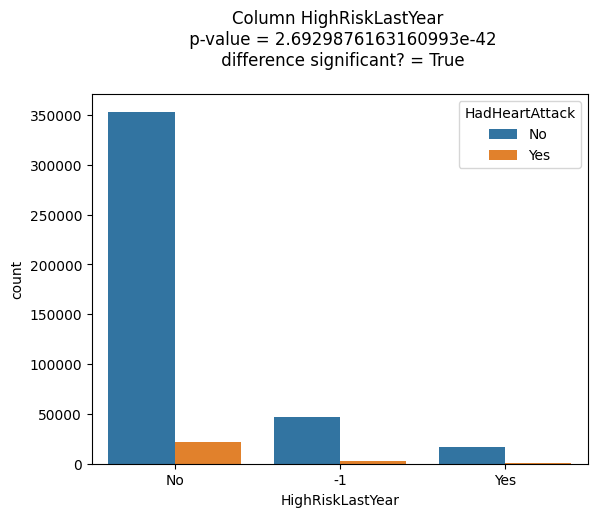

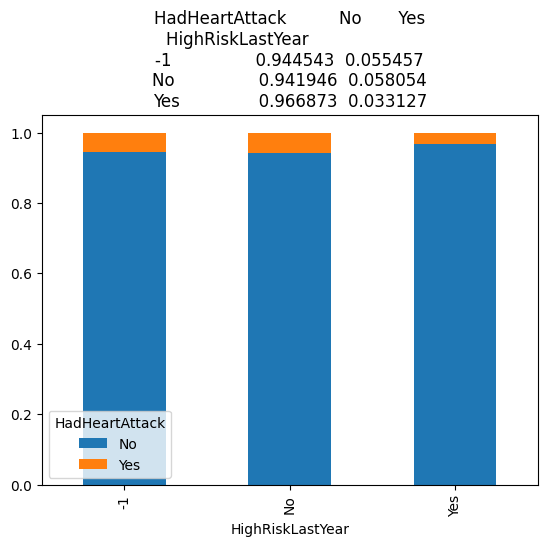

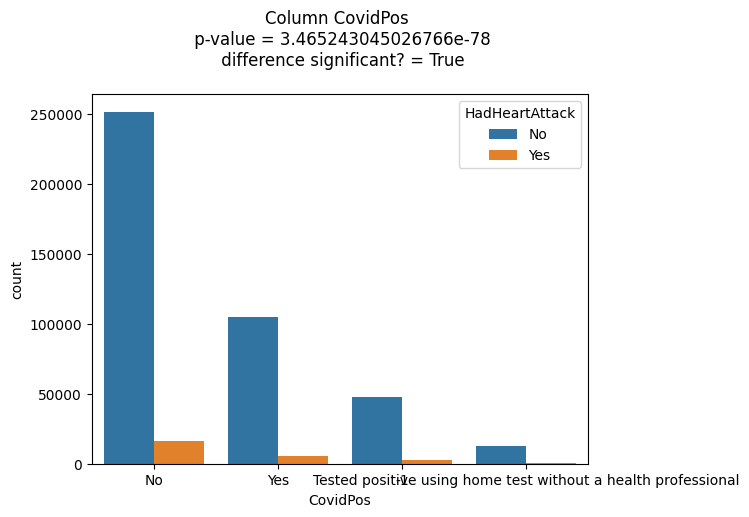

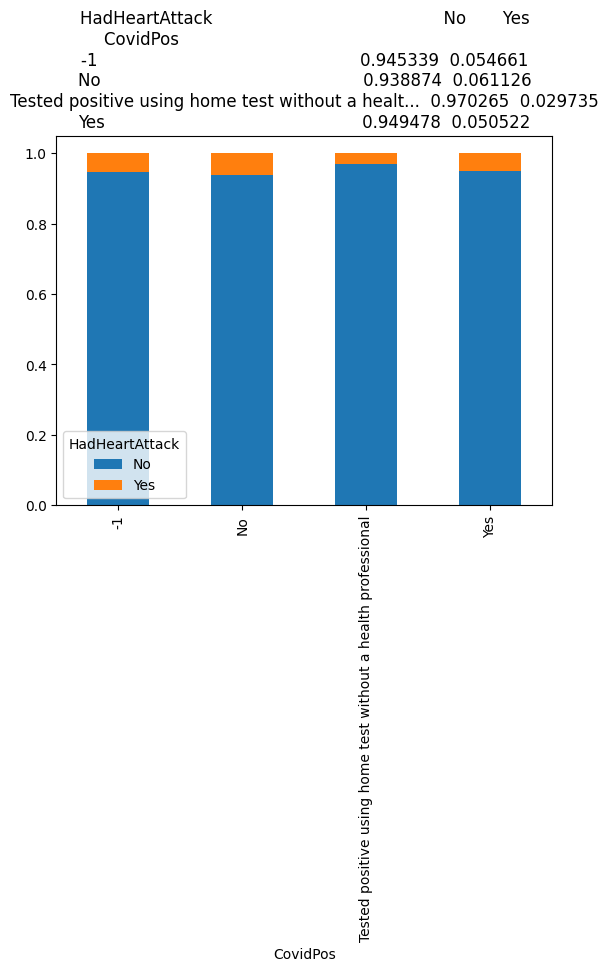

In [ ]:
cat_df_cleaned = df_cleaned[df_cleaned.columns[~df_cleaned.columns.isin(num_col)]]

for col in list(cat_df_cleaned):
  if col != 'HadHeartAttack':
    plt.figure()
    BVA_categorical_plot(cat_df_cleaned, 'HadHeartAttack', col)
    plt.show()

# Data Transformation

In [ ]:
def binary_encode(cat_col):
  if cat_col == 'Yes':
    return 1
  elif cat_col == 'No':
    return 0
  else:
    return -1

binary_features = [
  'PhysicalActivities',
  'HadAngina',
  'HadStroke',
  'HadAsthma',
  'HadSkinCancer',
  'HadCOPD',
  'HadDepressiveDisorder',
  'HadKidneyDisease',
  'HadArthritis',
  'DeafOrHardOfHearing',
  'BlindOrVisionDifficulty',
  'DifficultyConcentrating',
  'DifficultyWalking',
  'DifficultyDressingBathing',
  'DifficultyErrands',
  'ChestScan',
  'AlcoholDrinkers',
  'HIVTesting',
  'FluVaxLast12',
  'PneumoVaxEver',
  'HighRiskLastYear',
  'HadHeartAttack'
]

for col in binary_features:
  df_cleaned[col] = df_cleaned.apply(lambda row: binary_encode(row[col]), axis=1)

In [ ]:
def GeneralHealth_encode(cat_col):
  if cat_col == 'Poor':
    return 0
  elif cat_col == 'Fair':
    return 1
  elif cat_col == 'Good':
    return 2
  elif cat_col == 'Very good':
    return 3
  elif cat_col == 'Excellent':
    return 4
  else:
    return -1

df_cleaned['GeneralHealth'] = df_cleaned.apply(lambda row: GeneralHealth_encode(row['GeneralHealth']), axis=1)

In [ ]:
def LastCheckupTime_encode(cat_col):
  if cat_col == '5 or more years ago':
    return 0
  elif cat_col == 'Within past 5 years (2 years but less than 5 years ago)':
    return 1
  elif cat_col == 'Within past 2 years (1 year but less than 2 years ago)':
    return 2
  elif cat_col == 'Within past year (anytime less than 12 months ago)':
    return 3
  else:
    return -1

df_cleaned['LastCheckupTime'] = df_cleaned.apply(lambda row: LastCheckupTime_encode(row['LastCheckupTime']), axis=1)

In [ ]:
def RemovedTeeth_encode(cat_col):
  if cat_col == 'None of them':
    return 0
  elif cat_col == '1 to 5':
    return 1
  elif cat_col == '6 or more, but not all':
    return 2
  elif cat_col == 'All':
    return 3
  else:
    return -1

df_cleaned['RemovedTeeth'] = df_cleaned.apply(lambda row: RemovedTeeth_encode(row['RemovedTeeth']), axis=1)

In [ ]:
def HadDiabetes_encode(cat_col):
  if cat_col == 'No':
    return 0
  elif cat_col == 'No, pre-diabetes or borderline diabetes':
    return 1
  elif cat_col == 'Yes, but only during pregnancy (female)':
    return 2
  elif cat_col == 'Yes':
    return 3
  else:
    return -1

df_cleaned['HadDiabetes'] = df_cleaned.apply(lambda row: HadDiabetes_encode(row['HadDiabetes']), axis=1)

In [ ]:
def SmokerStatus_encode(cat_col):
  if cat_col == 'Never smoked':
    return 0
  elif cat_col == 'Former smoker':
    return 1
  elif cat_col == 'Current smoker - now smokes some days':
    return 2
  elif cat_col == 'Current smoker - now smokes every day':
    return 3
  else:
    return -1

df_cleaned['SmokerStatus'] = df_cleaned.apply(lambda row: SmokerStatus_encode(row['SmokerStatus']), axis=1)

In [ ]:
def ECigaretteUsage_encode(cat_col):
  if cat_col == 'Never used e-cigarettes in my entire life':
    return 0
  elif cat_col == 'Not at all (right now)':
    return 1
  elif cat_col == 'Use them some days':
    return 2
  elif cat_col == 'Use them every day':
    return 3
  else:
    return -1

df_cleaned['ECigaretteUsage'] = df_cleaned.apply(lambda row: ECigaretteUsage_encode(row['ECigaretteUsage']), axis=1)

In [ ]:
def AgeCategory_encode(cat_col):
  if cat_col == 'Age 18 to 24':
    return 0
  elif cat_col == 'Age 25 to 29':
    return 1
  elif cat_col == 'Age 30 to 34':
    return 2
  elif cat_col == 'Age 35 to 39':
    return 3
  elif cat_col == 'Age 40 to 44':
    return 4
  elif cat_col == 'Age 45 to 49':
    return 5
  elif cat_col == 'Age 50 to 54':
    return 6
  elif cat_col == 'Age 55 to 59':
    return 7
  elif cat_col == 'Age 60 to 64':
    return 8
  elif cat_col == 'Age 65 to 69':
    return 9
  elif cat_col == 'Age 70 to 74':
    return 10
  elif cat_col == 'Age 75 to 79':
    return 11
  elif cat_col == 'Age 80 or older':
    return 12
  else:
    return -1

df_cleaned['AgeCategory'] = df_cleaned.apply(lambda row: AgeCategory_encode(row['AgeCategory']), axis=1)

In [ ]:
def TetanusLast10Tdap_encode(cat_col):
  if cat_col == 'No, did not receive any tetanus shot in the past 10 years':
    return 0
  elif cat_col == 'Yes, received tetanus shot, but not Tdap':
    return 1
  elif cat_col == 'Yes, received tetanus shot but not sure what type':
    return 2
  elif cat_col == 'Yes, received Tdap':
    return 3
  else:
    return -1

df_cleaned['TetanusLast10Tdap'] = df_cleaned.apply(lambda row: TetanusLast10Tdap_encode(row['TetanusLast10Tdap']), axis=1)

In [ ]:
def CovidPos_encode(cat_col):
  if cat_col == 'No':
    return 0
  elif cat_col == 'Yes':
    return 1
  elif cat_col == 'Tested positive using home test without a health professional':
    return 2
  else:
    return -1

df_cleaned['CovidPos'] = df_cleaned.apply(lambda row: CovidPos_encode(row['CovidPos']), axis=1)

In [ ]:
def Sex_encode(cat_col):
  if cat_col == 'Female':
    return 0
  elif cat_col == 'Male':
    return 1
  else:
    return -1

df_cleaned['Sex'] = df_cleaned.apply(lambda row: Sex_encode(row['Sex']), axis=1)

In [ ]:
df_cleaned.columns

Index(['PhysicalHealthDays', 'MentalHealthDays', 'SleepHours', 'BMI', 'Sex',
       'GeneralHealth', 'LastCheckupTime', 'PhysicalActivities',
       'RemovedTeeth', 'HadHeartAttack', 'HadAngina', 'HadStroke', 'HadAsthma',
       'HadSkinCancer', 'HadCOPD', 'HadDepressiveDisorder', 'HadKidneyDisease',
       'HadArthritis', 'HadDiabetes', 'DeafOrHardOfHearing',
       'BlindOrVisionDifficulty', 'DifficultyConcentrating',
       'DifficultyWalking', 'DifficultyDressingBathing', 'DifficultyErrands',
       'SmokerStatus', 'ECigaretteUsage', 'ChestScan', 'AgeCategory',
       'AlcoholDrinkers', 'HIVTesting', 'FluVaxLast12', 'PneumoVaxEver',
       'TetanusLast10Tdap', 'HighRiskLastYear', 'CovidPos'],
      dtype='object')

# Data Splitting

In [ ]:
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.utils import class_weight
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler
from collections import Counter
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, classification_report, roc_curve
from sklearn.preprocessing import LabelBinarizer

x = df_cleaned.iloc[:,0:].drop(['HadHeartAttack'],axis = 1)
y = df_cleaned.loc[:,'HadHeartAttack']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42, stratify=y)

classes_weights = class_weight.compute_sample_weight(class_weight='balanced', y=y_train)
class_distribution = dict(df_cleaned['HadHeartAttack'].value_counts())
total_samples = len(df_cleaned['HadHeartAttack'])
class_weights = {cls:total_samples/(len(class_distribution) * count) for cls, count in class_distribution.items()}

print(classes_weights)
print(class_weights)

print(x_train.shape)
print(x_test.shape)

[0.53010789 0.53010789 0.53010789 ... 8.80347008 8.80347008 0.53010789]
{0: np.float64(0.5301084758933132), 1: np.float64(8.803309702086985)}
(353653, 35)
(88414, 35)


# Machine Learning Modelling and Evaluation

# RandomForest (RF)


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import StratifiedKFold, GridSearchCV, RandomizedSearchCV
from sklearn.metrics import make_scorer
import time

precision_weighted = make_scorer(precision_score, average='weighted')
recall_weighted = make_scorer(recall_score, average='weighted')
f1_weighted = make_scorer(f1_score, average='weighted')

params = {
    'n_estimators': [250, 350, 400],
    'max_depth': [8, 9],
    'min_samples_split': [5,6],
    'min_samples_leaf': [5,6],
    'class_weight': [class_weights]
}

rf = RandomForestClassifier(random_state=42)
skfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
rf_model = GridSearchCV(rf, param_grid=params, cv=skfold, scoring=precision_weighted, n_jobs=-1, verbose = 12)
start_time = time.time()
rf_model.fit(x_train, y_train)
end_time = time.time()
print(f"Training time for Random Forest Grid Search: {end_time - start_time:.4f} seconds")
print(rf_model.best_params_)

Fitting 5 folds for each of 24 candidates, totalling 120 fits


KeyboardInterrupt: 

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import StratifiedKFold, GridSearchCV, RandomizedSearchCV
import time

rf = RandomForestClassifier(bootstrap = True, n_estimators=350, min_samples_split=5, min_samples_leaf= 6, class_weight=class_weights,
                           max_depth = 9, oob_score = True, random_state=42)
start_time = time.time()
rf.fit(x_train, y_train)
end_time = time.time()
print(f"Training time for Random Forest: {end_time - start_time:.4f} seconds")

Training time for Random Forest: 108.1773 seconds


In [ ]:
rf_y_pred = pd.DataFrame(rf.predict(x_test))
print(classification_report(y_test, rf_y_pred))
print(confusion_matrix(y_test, rf_y_pred))

              precision    recall  f1-score   support

           0       0.98      0.82      0.89     83392
           1       0.21      0.77      0.33      5022

    accuracy                           0.82     88414
   macro avg       0.60      0.80      0.61     88414
weighted avg       0.94      0.82      0.86     88414

[[68452 14940]
 [ 1132  3890]]


In [ ]:
results_head = ['ROC AUC Score','Accuracy','Precision','Recall','F1 Score','Training Time']
rf_results1 = [roc_auc_score(y_test, rf_y_pred), accuracy_score(y_test, rf_y_pred), precision_score(y_test, rf_y_pred), recall_score(y_test, rf_y_pred), f1_score(y_test, rf_y_pred), end_time - start_time]
rf_results0 = list(zip(results_head, rf_results1))
rf_results = pd.DataFrame(data = rf_results0, columns=['Evaluation Metrics', 'Random Forest'])
rf_results

,Evaluation Metrics,Random Forest
0,ROC AUC Score,0.797719
1,Accuracy,0.818219
2,Precision,0.206585
3,Recall,0.774592
4,F1 Score,0.326178
5,Training Time,108.177337


# Light Gradient Boosting Machine (LightGBM)


In [ ]:
import lightgbm as lgb
from sklearn.model_selection import StratifiedKFold, GridSearchCV, RandomizedSearchCV
from sklearn.metrics import make_scorer
import time

precision_weighted = make_scorer(precision_score, average='weighted')
recall_weighted = make_scorer(recall_score, average='weighted')
f1_weighted = make_scorer(f1_score, average='weighted')

params = {
    'n_estimators': [250, 350, 400],
    'max_depth': [8, 9],
    'min_samples_split': [5,6],
    'min_samples_leaf': [5,6],
    'class_weight': [class_weights]
}

lgb = lgb.LGBMClassifier(random_state=42)
skfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
lgb_model = GridSearchCV(lgb, param_grid=params, cv=skfold, scoring=precision_weighted, n_jobs=-1, verbose = 12)
start_time = time.time()
lgb_model.fit(x_train, y_train)
end_time = time.time()
print(f"Training time for Light Gradient Boosting Grid Search: {end_time - start_time:.4f} seconds")
print(lgb_model.best_params_)

Fitting 5 folds for each of 24 candidates, totalling 120 fits
[LightGBM] [Warning] min_data_in_leaf is set with min_child_samples=20, will be overridden by min_samples_leaf=6. Current value: min_data_in_leaf=6
[LightGBM] [Warning] Unknown parameter: min_samples_split
[LightGBM] [Warning] min_data_in_leaf is set with min_child_samples=20, will be overridden by min_samples_leaf=6. Current value: min_data_in_leaf=6
[LightGBM] [Warning] Unknown parameter: min_samples_split
[LightGBM] [Info] Number of positive: 20086, number of negative: 333567
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.155384 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 463
[LightGBM] [Info] Number of data points in the train set: 353653, number of used features: 35
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.499995 -> initscore=-0.000019
[LightGBM] [Info] Sta

In [ ]:
import lightgbm as lgb

lgb = lgb.LGBMClassifier(n_estimators=250, min_samples_split=5, min_samples_leaf= 6, class_weight=class_weights, max_depth = 8, random_state=42)
start_time = time.time()
lgb.fit(x_train, y_train)
end_time = time.time()
print(f"Training time for Light Gradient Boosting: {end_time - start_time:.4f} seconds")

[LightGBM] [Warning] min_data_in_leaf is set with min_child_samples=20, will be overridden by min_samples_leaf=6. Current value: min_data_in_leaf=6
[LightGBM] [Warning] Unknown parameter: min_samples_split
[LightGBM] [Warning] min_data_in_leaf is set with min_child_samples=20, will be overridden by min_samples_leaf=6. Current value: min_data_in_leaf=6
[LightGBM] [Warning] Unknown parameter: min_samples_split
[LightGBM] [Info] Number of positive: 20086, number of negative: 333567
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.126960 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 463
[LightGBM] [Info] Number of data points in the train set: 353653, number of used features: 35
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.499995 -> initscore=-0.000019
[LightGBM] [Info] Start training from score -0.000019
Training time for Light Gradi

In [ ]:
lgb_y_pred = pd.DataFrame(lgb.predict(x_test))
print(classification_report(y_test, lgb_y_pred))
print(confusion_matrix(y_test, lgb_y_pred))

[LightGBM] [Warning] min_data_in_leaf is set with min_child_samples=20, will be overridden by min_samples_leaf=6. Current value: min_data_in_leaf=6
[LightGBM] [Warning] Unknown parameter: min_samples_split
              precision    recall  f1-score   support

           0       0.98      0.83      0.90     83392
           1       0.22      0.77      0.34      5022

    accuracy                           0.83     88414
   macro avg       0.60      0.80      0.62     88414
weighted avg       0.94      0.83      0.87     88414

[[69373 14019]
 [ 1136  3886]]


In [ ]:
results_head = ['ROC AUC Score','Accuracy','Precision','Recall','F1 Score','Training Time']
lgb_results1 = [roc_auc_score(y_test, lgb_y_pred), accuracy_score(y_test, lgb_y_pred), precision_score(y_test, lgb_y_pred), recall_score(y_test, lgb_y_pred), f1_score(y_test, lgb_y_pred), end_time - start_time]
lgb_results0 = list(zip(results_head, lgb_results1))
lgb_results = pd.DataFrame(data = lgb_results0, columns=['Evaluation Metrics', 'Light Gradient Boosting'])
lgb_results

,Evaluation Metrics,Light Gradient Boosting
0,ROC AUC Score,0.802843
1,Accuracy,0.828590
2,Precision,0.217034
3,Recall,0.773795
4,F1 Score,0.338989
5,Training Time,10.118796


# Extreme Gradient Boosting (XGBoost)

In [ ]:
import xgboost as xgb
from sklearn.model_selection import StratifiedKFold, GridSearchCV, RandomizedSearchCV
from sklearn.metrics import make_scorer
import time

precision_weighted = make_scorer(precision_score, average='weighted')
recall_weighted = make_scorer(recall_score, average='weighted')
f1_weighted = make_scorer(f1_score, average='weighted')

params = {
    'n_estimators': [250, 350, 400],
    'max_depth': [8, 9, 10],
    'min_samples_split': [5,6,7],
    'min_samples_leaf': [5,6,7],
    'class_weight': [class_weights]
}

xgb = xgb.XGBClassifier(random_state=42)
skfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
xgb_model = GridSearchCV(xgb, param_grid=params, cv=skfold, scoring=precision_weighted, n_jobs=-1, verbose = 12)
start_time = time.time()
xgb_model.fit(x_train, y_train)
end_time = time.time()
print(f"Training time for Xtreme Gradient Boosting Grid Search: {end_time - start_time:.4f} seconds")
print(xgb_model.best_params_)

Fitting 5 folds for each of 81 candidates, totalling 405 fits


KeyboardInterrupt: 

In [ ]:
import xgboost as xgb

xgb = xgb.XGBClassifier(n_estimators=250, min_samples_split=5, min_samples_leaf= 5, max_depth = 9, random_state=42)

start_time = time.time()
xgb.fit(x_train, y_train, sample_weight=classes_weights)
end_time = time.time()
print(f"Training time for Xtreme Gradient Boosting: {end_time - start_time:.4f} seconds")

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [08:16:16] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "min_samples_leaf", "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)


Training time for Xtreme Gradient Boosting: 15.7013 seconds


In [ ]:
xgb_y_pred = pd.DataFrame(xgb.predict(x_test))
print(classification_report(y_test, xgb_y_pred))
print(confusion_matrix(y_test, xgb_y_pred))

              precision    recall  f1-score   support

           0       0.97      0.93      0.95     83392
           1       0.30      0.51      0.38      5022

    accuracy                           0.90     88414
   macro avg       0.64      0.72      0.66     88414
weighted avg       0.93      0.90      0.92     88414

[[77404  5988]
 [ 2438  2584]]


In [ ]:
results_head = ['ROC AUC Score','Accuracy','Precision','Recall','F1 Score','Training Time']
xgb_results1 = [roc_auc_score(y_test, xgb_y_pred), accuracy_score(y_test, xgb_y_pred), precision_score(y_test, xgb_y_pred), recall_score(y_test, xgb_y_pred), f1_score(y_test, xgb_y_pred), end_time - start_time]
xgb_results0 = list(zip(results_head, xgb_results1))
xgb_results = pd.DataFrame(data = xgb_results0, columns=['Evaluation Metrics', 'Xtreme Gradient Boosting'])
xgb_results

,Evaluation Metrics,Xtreme Gradient Boosting
0,ROC AUC Score,0.721365
1,Accuracy,0.904698
2,Precision,0.301447
3,Recall,0.514536
4,F1 Score,0.380168
5,Training Time,16.199954


# Adaptive Boosting (AdaBoost)

In [ ]:
from sklearn.ensemble import AdaBoostClassifier

ada = AdaBoostClassifier(n_estimators=400, random_state=42, learning_rate=1)
start_time = time.time()
ada.fit(x_train, y_train)
end_time = time.time()
print(f"Training time for Ada Boosting: {end_time - start_time:.4f} seconds")

Training time for Ada Boosting: 116.6216 seconds


In [ ]:
ada_y_pred = pd.DataFrame(ada.predict(x_test))
print(classification_report(y_test, ada_y_pred))
print(confusion_matrix(y_test, ada_y_pred))

              precision    recall  f1-score   support

           0       0.96      0.99      0.97     83392
           1       0.55      0.26      0.35      5022

    accuracy                           0.95     88414
   macro avg       0.75      0.62      0.66     88414
weighted avg       0.93      0.95      0.94     88414

[[82334  1058]
 [ 3720  1302]]


In [ ]:
results_head = ['ROC AUC Score','Accuracy','Precision','Recall','F1 Score','Training Time']
ada_results1 = [roc_auc_score(y_test, ada_y_pred), accuracy_score(y_test, ada_y_pred), precision_score(y_test, ada_y_pred), recall_score(y_test, ada_y_pred), f1_score(y_test, ada_y_pred), end_time - start_time]
ada_results0 = list(zip(results_head, ada_results1))
ada_results = pd.DataFrame(data = ada_results0, columns=['Evaluation Metrics', 'Ada Boosting'])
ada_results

,Evaluation Metrics,Ada Boosting
0,ROC AUC Score,0.623286
1,Accuracy,0.945959
2,Precision,0.551695
3,Recall,0.259259
4,F1 Score,0.352750
5,Training Time,116.621635


# Logistic Regression (LR)

In [ ]:
from sklearn.linear_model import LogisticRegression

lor = LogisticRegression(max_iter=400, random_state=42, class_weight=class_weights)
start_time = time.time()
lor.fit(x_train, y_train)
end_time = time.time()
print(f"Training time for Logisic Regression: {end_time - start_time:.4f} seconds")

Training time for Logisic Regression: 16.1204 seconds


In [ ]:
lor_y_pred = pd.DataFrame(lor.predict(x_test))
print(classification_report(y_test, lor_y_pred))
print(confusion_matrix(y_test, lor_y_pred))

              precision    recall  f1-score   support

           0       0.98      0.80      0.88     83392
           1       0.18      0.75      0.30      5022

    accuracy                           0.80     88414
   macro avg       0.58      0.78      0.59     88414
weighted avg       0.94      0.80      0.85     88414

[[66673 16719]
 [ 1240  3782]]


In [ ]:
results_head = ['ROC AUC Score','Accuracy','Precision','Recall','F1 Score','Training Time']
lor_results1 = [roc_auc_score(y_test, lor_y_pred), accuracy_score(y_test, lor_y_pred), precision_score(y_test, lor_y_pred), recall_score(y_test, lor_y_pred), f1_score(y_test, lor_y_pred), end_time - start_time]
lor_results0 = list(zip(results_head, lor_results1))
lor_results = pd.DataFrame(data = lor_results0, columns=['Evaluation Metrics', 'Logisic Regression'])
lor_results

,Evaluation Metrics,Logisic Regression
0,ROC AUC Score,0.776300
1,Accuracy,0.796876
2,Precision,0.184479
3,Recall,0.753086
4,F1 Score,0.296360
5,Training Time,16.120414


# Model Comparison

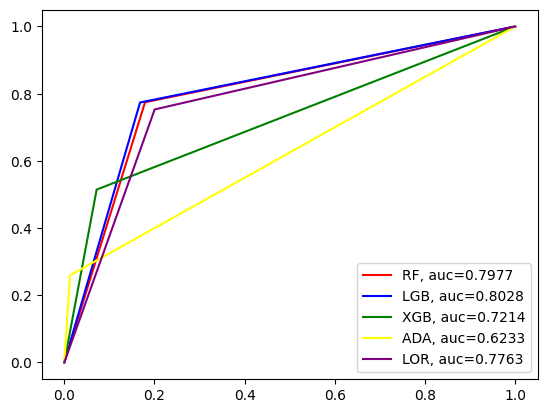

In [ ]:
xgb_fpr, xgb_tpr, _ = roc_curve(y_test, xgb_y_pred)
xgb_auc = round(roc_auc_score(y_test, xgb_y_pred),4)

rf_fpr, rf_tpr, _ = roc_curve(y_test, rf_y_pred)
rf_auc = round(roc_auc_score(y_test, rf_y_pred),4)

lgb_fpr, lgb_tpr, _ = roc_curve(y_test, lgb_y_pred)
lgb_auc = round(roc_auc_score(y_test, lgb_y_pred),4)

ada_fpr, ada_tpr, _ = roc_curve(y_test, ada_y_pred)
ada_auc = round(roc_auc_score(y_test, ada_y_pred),4)

lor_fpr, lor_tpr, _ = roc_curve(y_test, lor_y_pred)
lor_auc = round(roc_auc_score(y_test, lor_y_pred),4)


plt.plot(rf_fpr,rf_tpr,label="RF, auc="+str(rf_auc),color='red')
plt.plot(lgb_fpr,lgb_tpr,label="LGB, auc="+str(lgb_auc),color='blue')
plt.plot(xgb_fpr,xgb_tpr,label="XGB, auc="+str(xgb_auc),color='green')
plt.plot(ada_fpr,ada_tpr,label="ADA, auc="+str(ada_auc),color='yellow')
plt.plot(lor_fpr,lor_tpr,label="LOR, auc="+str(lor_auc),color='purple')
plt.legend(loc=4)
plt.show()

In [ ]:
results = pd.concat([rf_results, lgb_results['Light Gradient Boosting'], xgb_results['Xtreme Gradient Boosting'], ada_results['Ada Boosting'], lor_results['Logisic Regression']], axis=1)
results

,Evaluation Metrics,Random Forest,Light Gradient Boosting,Xtreme Gradient Boosting,Ada Boosting,Logisic Regression
0,ROC AUC Score,0.797719,0.802843,0.721365,0.623286,0.776300
1,Accuracy,0.818219,0.828590,0.904698,0.945959,0.796876
2,Precision,0.206585,0.217034,0.301447,0.551695,0.184479
3,Recall,0.774592,0.773795,0.514536,0.259259,0.753086
4,F1 Score,0.326178,0.338989,0.380168,0.352750,0.296360
5,Training Time,108.177337,10.118796,16.199954,116.621635,16.120414


**Results Interpretation**
1. All 5 models demonstrated convincing performance across ROC AUC Score and Accuracy.
2. While for Precision and Recall, most of the models except Extreme Gradient Boosting (XGBoost), are not having good balance between two metrics.
3. On overall performance, XGBoost has shown to achieve best performance in all metrics, with a relatively good balance between Precision (0.52) and Recall (0.89), and shorter training time as well (18.98 seconds, second fastest among all models).
3. Therefore, XGBoost model will be chosen as the recommended model due to its performance.

# Feature Importance

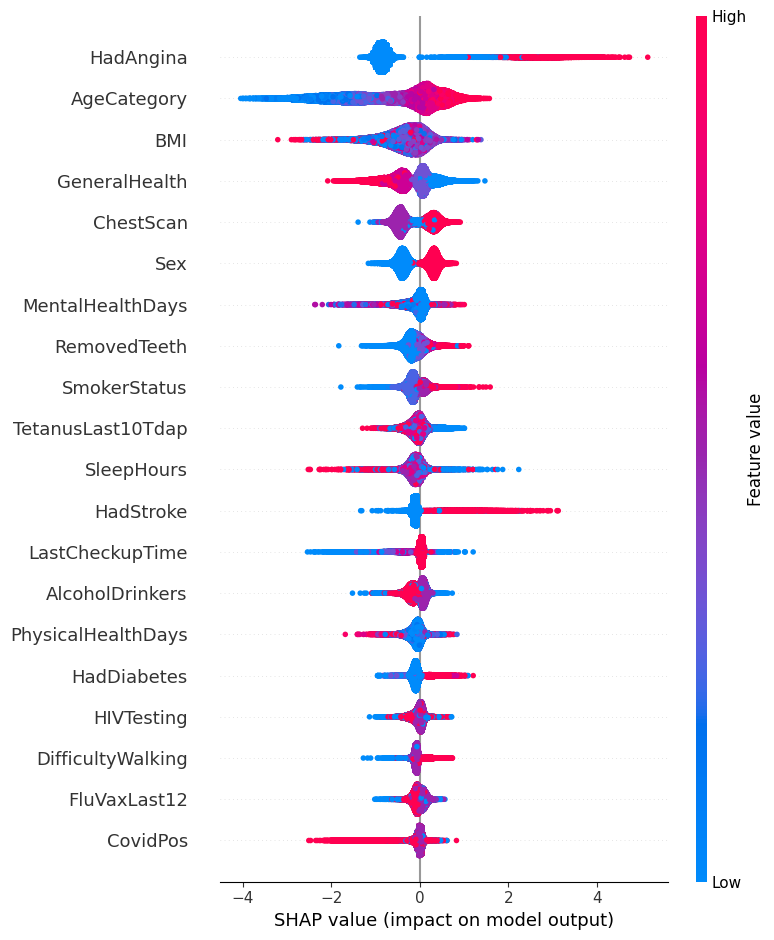

In [ ]:
import shap
shap.initjs()

explainer = shap.Explainer(xgb)
shap_values = explainer.shap_values(x_test)

shap.summary_plot(shap_values, x_test)

# Conclusion

In this project, multiple classification models were developed, including Random Forest, Light Gradient Boosting, Xtreme Gradient Boosting (XGBoost), Adaptive Boosting (AdaBoost), and Logistic Regression. **XGBoost** was chosen as the final model to be recommended due to its performance at predicting heart disease and generally less computational expensive.


---



Based on the estimates of XGBoost, variables as stated below were found to be the stronger indicators in predicting the patients with heart disease risk. This includes:

`HadAngina`: Patient with angina before shows higher risk

`AgeCategory`: Patient from older age groups shows higher risk

`BMI`: Patient with extremely low (underweight) or extremely high (overweight) BMI shows higher risk

`GeneralHealth`: Patient with poorer health condition shows higher risk

`ChestScan`: Patient who did chest scan before show higher risk

`Sex`: Male patient shows higher risk

`MentalHealthDays`: Patient with high mental health days shows higher risk

`RemovedTeeth`: Patient who removed teeth before shows higher risk

`SmokerStatus`: Patient who currently smoking or smoked before shows higher risk

`TetanusLast10Tdap`: Patient who did not receive tetanus shot shows higher risk


---

In conclusion, heart disease detection and early intervention can be improved by leveraging the insights summarized here. Machine Learning solution can be developed based on the suggested algorithm (XGBoost) and public awareness can be raised based on the important health factors as stated above (HadAngina, ChestScan and more), in hope to accurately target potential patients and reduce the risk of serious consequences.

In [ ]:
import pickle

with open('xgb_model.pkl', 'wb') as f:
  pickle.dump(xgb, f)